# About Dataset

The dataset contains information about past Kickstarter projects, including features such as project category, funding goal, project launch and deadline date, project backers and historical project outcomes.

# Problem Statement

The objective of this project is to develop a machine learning model that can predict whether a Kickstarter project will be successful or not based on various project attributes and historical data.

Source of the dataset: https://www.kaggle.com/datasets/kemical/kickstarter-projects

# Data Dictionary

Features in Original dataset-- 
id: A unique identifier for each Kickstarter project. 
name: The name or title of the project. 
category: The category of the project. 
sub_category: The sub-category of the project. 
currency: The currency used for the funding goal and pledges. 
deadline: The date and time by which the project needs to reach its funding goal. 
goal: The funding goal set by the project creator. 
launched: The date and time when the project was launched on Kickstarter. 
pledged: The amount pledged by backers so far. 
state: The current state of the project (successful, failed, live, etc.). 
backers: The number of backers who have supported the project. 
country: The country where the project creator is located. 
usd_pledged:The amount pledged by backers converted to USD.
usd_goal: The funding goal converted to USD.

Features Added- 
days: The difference between launch-date and deadline of project. 
backer_goal:The target usd_goal to be fulfilled by each backer. 
year: The year when the project was launched. 
quarter: The quarter of the year when the project was launched. 
Major Cat: The major category of the project. 
GDP (current US ): 𝑇ℎ𝑒 𝐺𝑟𝑜𝑠𝑠𝐷𝑜𝑚𝑒𝑠𝑡𝑖𝑐𝑃𝑟𝑜𝑑𝑢𝑐𝑡(𝐺𝐷𝑃) 𝑜𝑓 𝑡ℎ𝑒 𝑐𝑜𝑢𝑛𝑡𝑟𝑦 𝑖𝑛 𝑐𝑢𝑟𝑟𝑒𝑛𝑡 𝑈𝑆𝑑𝑜𝑙𝑙𝑎𝑟𝑠. 
𝐺𝐷𝑃𝑝𝑒𝑟𝑐𝑎𝑝𝑖𝑡𝑎(𝑐𝑢𝑟𝑟𝑒𝑛𝑡𝑈𝑆): The GDP per capita of the country in current US dollars.

In [1]:
# Importing Required  Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
## display all columns of the dataframe
pd.options.display.max_columns = None
# display all rows of the dataframe
#pd.options.display.max_rows = None

In [3]:
df= pd.read_csv('Kickstarter2308.csv')

In [4]:
df.head(5)

,id,name,category,sub_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_goal,duration,backer_goal,year,quarter,Major Cat,GDP (current US$),GDP per capita (current US$),employment rate,inflation rate
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,09-10-2015,1000.0,11-08-2015,0.0,failed,0,GB,0.0,1533.95,59,0,2015,3,Publishing & Literature,3.200000e+09,44824.0,73.67500,0.368047
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01-11-2017,30000.0,02-09-2017,2421.0,failed,15,US,2421.0,30000.00,60,2000,2017,3,"Film, Video & Theater",2.118300e+10,65840.0,70.11017,2.130110
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,26-02-2013,45000.0,12-01-2013,220.0,failed,3,US,220.0,45000.00,45,15000,2013,1,"Film, Video & Theater",1.660300e+10,53920.0,67.35994,1.464833
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,16-04-2012,5000.0,17-03-2012,1.0,failed,1,US,1.0,5000.00,30,5000,2012,1,Music & Performance,1.578300e+10,51640.0,67.13661,2.069337
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,29-08-2015,19500.0,04-07-2015,1283.0,canceled,14,US,1283.0,19500.00,56,1393,2015,3,"Film, Video & Theater",1.863300e+10,59320.0,68.70962,0.118627


# Understanding the Dataset

In [5]:
df.shape

(378661, 23)

In [6]:
df.dtypes

id                                int64
name                             object
category                         object
sub_category                     object
currency                         object
deadline                         object
goal                            float64
launched                         object
pledged                         float64
state                            object
backers                           int64
country                          object
usd_pledged                     float64
usd_goal                        float64
duration                          int64
backer_goal                       int64
year                              int64
quarter                           int64
Major Cat                        object
GDP (current US$)               float64
GDP per capita (current US$)    float64
employment rate                 float64
inflation rate                  float64
dtype: object

# Changing Data-types as required

In [7]:
#Extracting object  variable to be converted in categorical varaible
object_var = [feature for feature in df.columns if (df[feature].dtype == 'object') and (feature  not in ['deadline', 'launched'])]
object_var

['name',
 'category',
 'sub_category',
 'currency',
 'state',
 'country',
 'Major Cat']

In [8]:
# Convert necessary object variables to categorical variables
for i in object_var:
    df[i] = df[i].astype('category')

In [9]:
#Converting required column in date datatype
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])

In [10]:
#Converting 'year' and 'quarter' column to categorical variable
df.year = df.year.astype('category')
df.quarter = df.quarter.astype('category')

In [11]:
#Rechecking the datatypes
df.dtypes

id                                       int64
name                                  category
category                              category
sub_category                          category
currency                              category
deadline                        datetime64[ns]
goal                                   float64
launched                        datetime64[ns]
pledged                                float64
state                                 category
backers                                  int64
country                               category
usd_pledged                            float64
usd_goal                               float64
duration                                 int64
backer_goal                              int64
year                                  category
quarter                               category
Major Cat                             category
GDP (current US$)                      float64
GDP per capita (current US$)           float64
employment ra

# Count of different Datatypes columns

In [12]:
categorical_count = 0
numerical_count = 0
datetime_count=0

for col in df.columns:
    if df[col].dtype == 'category':
        categorical_count += 1
    elif df[col].dtype=='datetime64[ns]':
        datetime_count+=1 
    else:
        numerical_count += 1

print("Number of categorical columns:", categorical_count)
print("Number of numerical columns:", numerical_count)
print("Number of datetime columns:", datetime_count)

Number of categorical columns: 9
Number of numerical columns: 12
Number of datetime columns: 2


# Summary Statistics

In [13]:
# describe the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,378661.0,1.074731e+09,6.190862e+08,5.971000e+03,5.382635e+08,1.075276e+09,1.610149e+09,2.147476e+09
goal,378661.0,4.908079e+04,1.183391e+06,1.000000e-02,2.000000e+03,5.200000e+03,1.600000e+04,1.000000e+08
pledged,378661.0,9.682979e+03,9.563601e+04,0.000000e+00,3.000000e+01,6.200000e+02,4.076000e+03,2.033899e+07
backers,378661.0,1.056175e+02,9.071850e+02,0.000000e+00,2.000000e+00,1.200000e+01,5.600000e+01,2.193820e+05
usd_pledged,378661.0,9.058924e+03,9.097334e+04,0.000000e+00,3.100000e+01,6.243300e+02,4.050000e+03,2.033899e+07
usd_goal,378661.0,4.545440e+04,1.152950e+06,1.000000e-02,2.000000e+03,5.500000e+03,1.550000e+04,1.663614e+08
duration,378661.0,3.448110e+01,6.590917e+01,1.000000e+00,3.000000e+01,3.000000e+01,3.700000e+01,1.673900e+04
backer_goal,378661.0,1.258844e+04,6.062110e+05,0.000000e+00,2.800000e+01,1.240000e+02,1.000000e+03,1.000000e+08
GDP (current US$),371992.0,1.448623e+10,6.506636e+09,6.830000e+07,1.509300e+10,1.660300e+10,1.863300e+10,2.265300e+10
GDP per capita (current US$),371992.0,5.646119e+04,8.764166e+03,3.350400e+04,5.164000e+04,5.648000e+04,6.215200e+04,1.221200e+05


In [74]:
# describe the categorical data
df.describe(include = 'category')

,name,category,sub_category,currency,state,country,year,quarter,Major Cat
count,378657,378661,378661,378661,378661,378661,378661,378661,378661
unique,375722,159,15,14,6,23,11,4,10
top,#NAME?,Product Design,Film & Video,USD,failed,US,2015,3,Arts & Crafts
freq,43,22314,63585,295365,197719,292627,77300,99727,98294


# Analysis and Treatment of Target Variable

In [14]:
state_counts = df['state'].value_counts()
print(state_counts)

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64


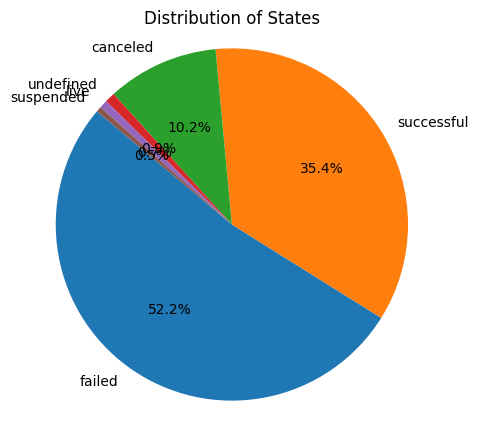

In [15]:
# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of States')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [16]:
# List of states to be replaced
states_to_replace = ['canceled', 'suspended']

# Update the 'state' column
df.loc[df['state'].isin(states_to_replace), 'state'] = 'failed'

In [17]:
# Drop rows where 'state' is neither 'failed' nor 'successful'
df.drop(df[~df['state'].isin(['failed', 'successful'])].index, inplace=True)

In [18]:
state_counts = df['state'].value_counts()
print(state_counts)

failed        238344
successful    133956
canceled           0
live               0
suspended          0
undefined          0
Name: state, dtype: int64


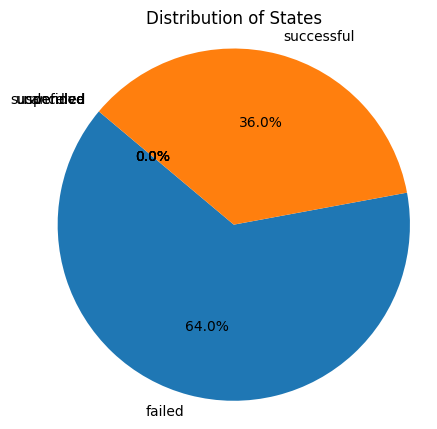

In [19]:
state_counts = df['state'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of States')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Treatment of Missing Values

In [20]:
df.isnull().sum()

id                                 0
name                               4
category                           0
sub_category                       0
currency                           0
deadline                           0
goal                               0
launched                           0
pledged                            0
state                              0
backers                            0
country                            0
usd_pledged                        0
usd_goal                           0
duration                           0
backer_goal                        0
year                               0
quarter                            0
Major Cat                          0
GDP (current US$)               2983
GDP per capita (current US$)    2983
employment rate                 2983
inflation rate                  2983
dtype: int64

In [21]:
Total = df.isnull().sum().sort_values(ascending=False) 
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
# print the missing data
missing_data

,Total,Percentage of Missing Values
inflation rate,2983,0.801236
employment rate,2983,0.801236
GDP per capita (current US$),2983,0.801236
GDP (current US$),2983,0.801236
name,4,0.001074
usd_pledged,0,0.000000
Major Cat,0,0.000000
quarter,0,0.000000
year,0,0.000000
backer_goal,0,0.000000


In [22]:
#As most of the states of GDP columns are undefined -it contributes only 1% of data-hence can be discarded
rows_with_null_gdp = df[df['GDP (current US$)'].isnull()]

# Step 2: Drop the identified rows from the DataFrame
df.drop(rows_with_null_gdp.index, inplace=True)

In [23]:
df.isnull().sum()

id                              0
name                            4
category                        0
sub_category                    0
currency                        0
deadline                        0
goal                            0
launched                        0
pledged                         0
state                           0
backers                         0
country                         0
usd_pledged                     0
usd_goal                        0
duration                        0
backer_goal                     0
year                            0
quarter                         0
Major Cat                       0
GDP (current US$)               0
GDP per capita (current US$)    0
employment rate                 0
inflation rate                  0
dtype: int64

In [24]:
df.loc[df['name'].isnull()]

,id,name,category,sub_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_goal,duration,backer_goal,year,quarter,Major Cat,GDP (current US$),GDP per capita (current US$),employment rate,inflation rate
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01,100.0,failed,1,US,100.00,200000.00,59,200000,2012,1,"Film, Video & Theater",1.578300e+10,51640.0,67.13661,2.069337
307234,634871725,NaN,Video Games,Games,GBP,2013-06-01,2000.0,2012-12-19,196.0,failed,12,GB,316.05,3224.97,18,269,2012,4,Technology & Gadgets,2.600000e+09,38000.0,70.97500,2.573235
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18,0.0,failed,0,US,0.00,2500.00,30,0,2016,2,Arts & Crafts,1.984300e+10,62440.0,69.35136,1.261583
338931,796533179,NaN,Painting,Art,USD,2011-05-12,35000.0,2011-06-11,220.0,failed,5,US,220.00,35000.00,29,7000,2011,4,Arts & Crafts,1.509300e+10,49624.0,66.64754,3.156842


In [25]:
df.columns

Index(['id', 'name', 'category', 'sub_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd_pledged', 'usd_goal', 'duration', 'backer_goal', 'year', 'quarter',
       'Major Cat', 'GDP (current US$)', 'GDP per capita (current US$)',
       'employment rate', 'inflation rate'],
      dtype='object')

In [26]:
df = df.rename(columns={"GDP (current US$)": "GDP (currency US$)", "GDP per capita (current US$)":"GDP per capita (currency US$)"})

In [27]:
df.columns

Index(['id', 'name', 'category', 'sub_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd_pledged', 'usd_goal', 'duration', 'backer_goal', 'year', 'quarter',
       'Major Cat', 'GDP (currency US$)', 'GDP per capita (currency US$)',
       'employment rate', 'inflation rate'],
      dtype='object')

# Dropping redundant columns

In [28]:
unique_id = df['id'].nunique()
print(unique_id)

369317


In [29]:
unique_name = df['name'].nunique()
print(unique_name)

366551


In [30]:
df.drop(['id', 'name'], axis=1, inplace=True)

In [31]:
df.drop(['sub_category','goal','pledged','GDP (currency US$)'], axis=1, inplace=True)

In [32]:
df.drop(['category'],axis=1,inplace=True)

# Analysis of Column-Main Category

In [33]:
# Get the total count of each main category
main_category_count = df['Major Cat'].value_counts()

# Get the percentage of each main category
main_category_percentage = df['Major Cat'].value_counts(normalize=True) * 100

# Create a new DataFrame to store the results
main_category_summary = pd.DataFrame({
    'Total Count': main_category_count,
    'Percentage (%)': main_category_percentage
})
print(main_category_summary)

                            Total Count  Percentage (%)
Arts & Crafts                     96710       26.186176
Film, Video & Theater             67623       18.310286
Music & Performance               49393       13.374147
Technology & Gadgets              47826       12.949851
Publishing & Literature           45885       12.424286
Food & Beverage                   21120        5.718664
Gaming & Entertainment            17199        4.656975
Miscellaneous                     15794        4.276543
Community & Civic Projects         5976        1.618122
Fashion & Apparel                  1791        0.484949


# Treatment of Outliers

In [34]:
df_numeric_features=df.select_dtypes(include=np.number)
df_numeric_features.columns

Index(['backers', 'usd_pledged', 'usd_goal', 'duration', 'backer_goal',
       'GDP per capita (currency US$)', 'employment rate', 'inflation rate'],
      dtype='object')

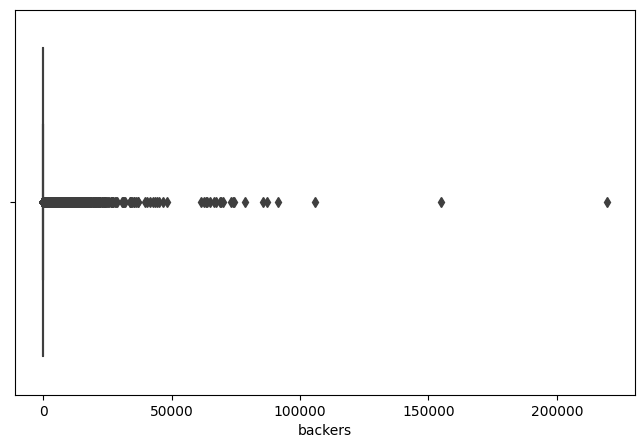

********************************************


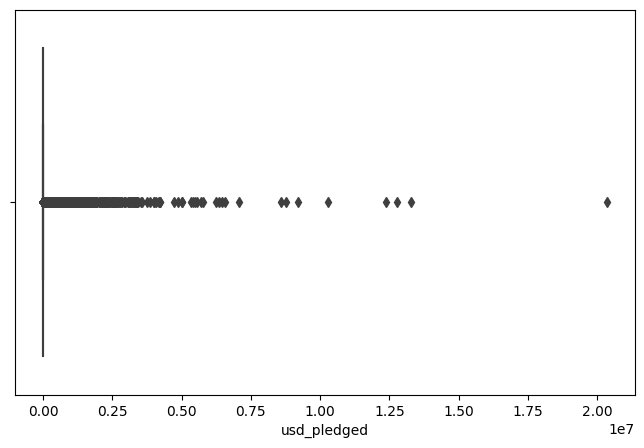

********************************************


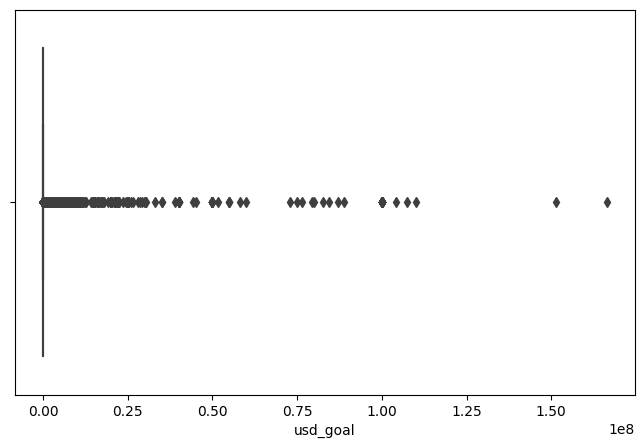

********************************************


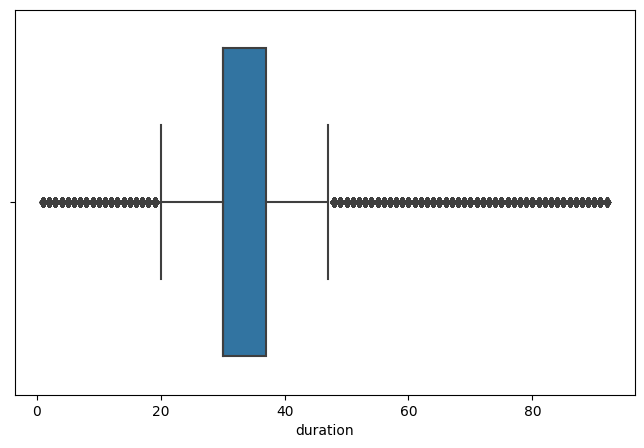

********************************************


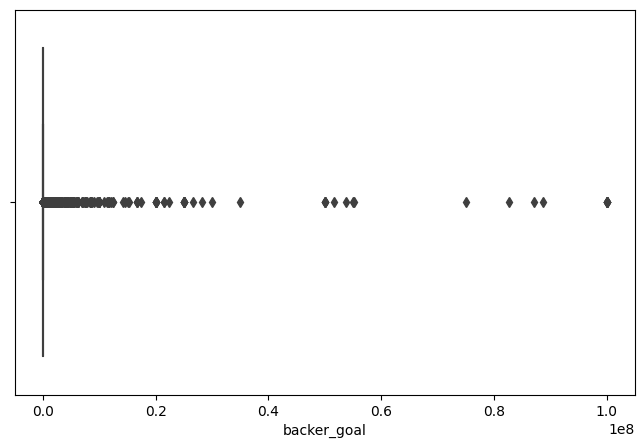

********************************************


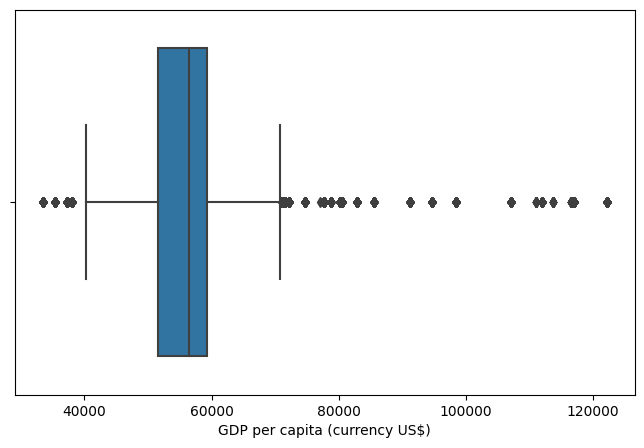

********************************************


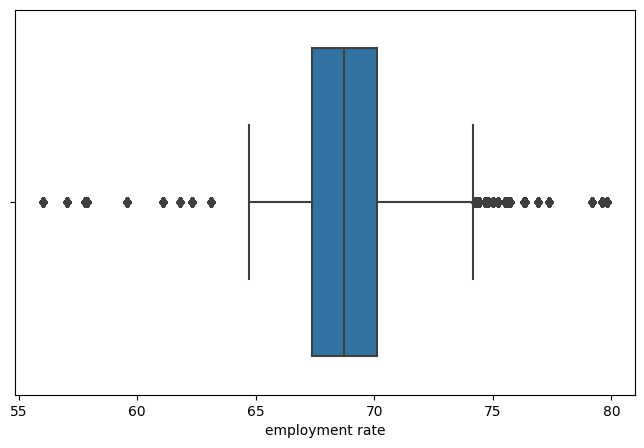

********************************************


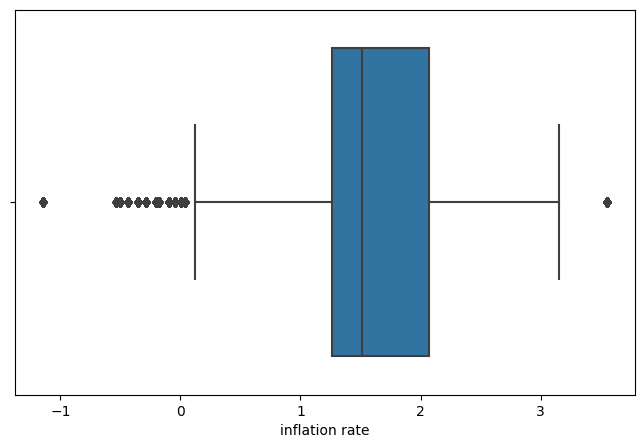

********************************************


In [35]:
for var in df_numeric_features.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(df[var])
    plt.show()
    
    print('***********'*4)

In [ ]:
#Dropping Outliers in usd_goal column

In [36]:
# Filter the rows to be removed based on the condition (goal >= 0.6 * 10^8)
rows_to_remove =df.loc[df['usd_goal'] >= 40000].index

# Drop the rows from the original DataFrame
df.drop(rows_to_remove, inplace=True)

# Optionally, you can reset the index of the DataFrame after dropping the rows
df.reset_index(drop=True, inplace=True)

In [37]:
# Filter the rows to be removed based on the condition (goal >= 0.6 * 10^8)
rows_to_remove =df.loc[df['usd_goal'] <= 1000].index

# Drop the rows from the original DataFrame
df.drop(rows_to_remove, inplace=True)

# Optionally, you can reset the index of the DataFrame after dropping the rows
df.reset_index(drop=True, inplace=True)

In [38]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['usd_goal'].quantile(0.25)
Q3 = df['usd_goal'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace the outlier values with the nearest non-outlying values within the bounds
df['usd_goal_iqr'] = df['usd_goal'].clip(lower_bound, upper_bound)

<AxesSubplot: xlabel='usd_goal_iqr'>

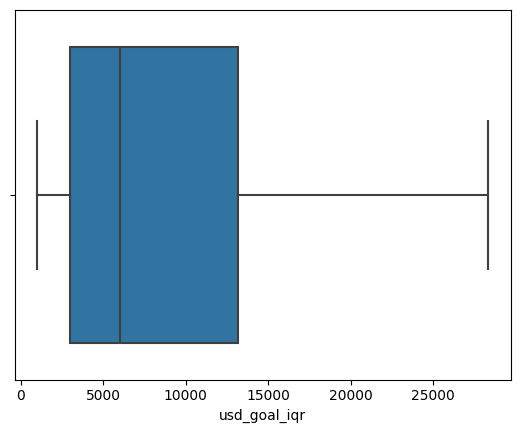

In [39]:
sns.boxplot(df['usd_goal_iqr'])

In [ ]:
#Treatment of usd_pledged

In [40]:
# Filter the rows to be removed based on the condition (goal >= 0.6 * 10^8)
rows_to_remove =df.loc[df['usd_pledged'] <= 200].index

# Drop the rows from the original DataFrame
df.drop(rows_to_remove, inplace=True)

# Optionally, you can reset the index of the DataFrame after dropping the rows
df.reset_index(drop=True, inplace=True)

In [41]:
# Filter the rows to be removed based on the condition (goal >= 0.6 * 10^8)
rows_to_remove =df.loc[df['usd_pledged'] >= 24000].index

# Drop the rows from the original DataFrame
df.drop(rows_to_remove, inplace=True)

# Optionally, you can reset the index of the DataFrame after dropping the rows
df.reset_index(drop=True, inplace=True)

<AxesSubplot: xlabel='usd_pledged'>

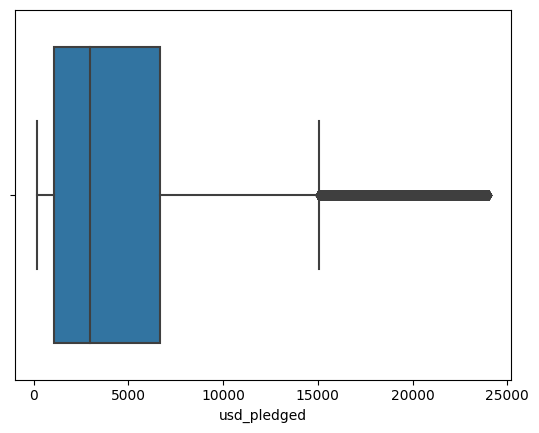

In [42]:
sns.boxplot(df['usd_pledged'])

In [33]:
df.shape

(158134, 15)

In [ ]:
#Treatment of backers column

In [43]:
# Filter the rows to be removed based on the condition (backers >= 0.6 * 10^8)
rows_to_remove =df.loc[df['backers'] >= 300].index

# Drop the rows from the original DataFrame
df.drop(rows_to_remove, inplace=True)

# Optionally, you can reset the index of the DataFrame after dropping the rows
df.reset_index(drop=True, inplace=True)

<AxesSubplot: xlabel='backers'>

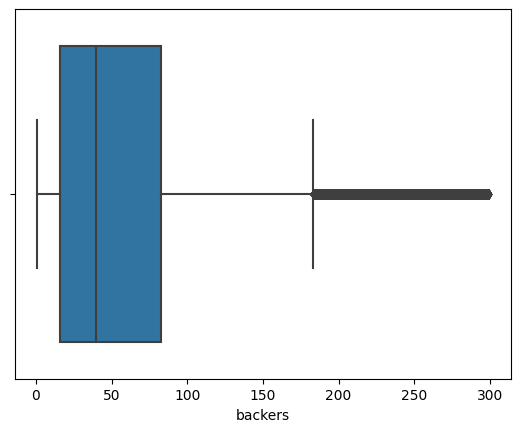

In [44]:
sns.boxplot(df['backers'])

In [ ]:
#Treatment of backer_goal

In [45]:
# Filter the rows to be removed based on the condition (backer_goal >= 0.6 * 10^8)
rows_to_remove =df.loc[df['backer_goal'] >= 3500].index

# Drop the rows from the original DataFrame
df.drop(rows_to_remove, inplace=True)

# Optionally, you can reset the index of the DataFrame after dropping the rows
df.reset_index(drop=True, inplace=True)

<AxesSubplot: xlabel='backer_goal'>

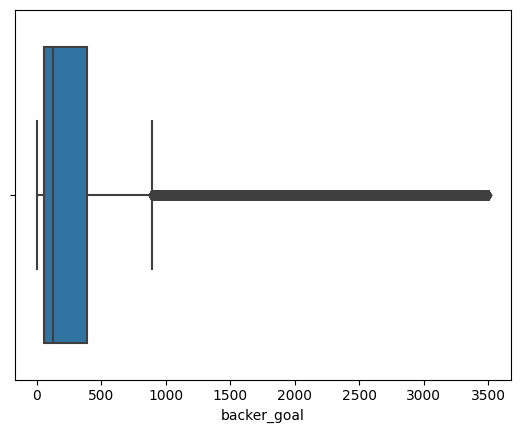

In [46]:
sns.boxplot(df['backer_goal'])

In [ ]:
#Treatment of GDP per Capita

In [47]:
df['GDP per capita (currency US$)'].skew()

2.3512468759146423

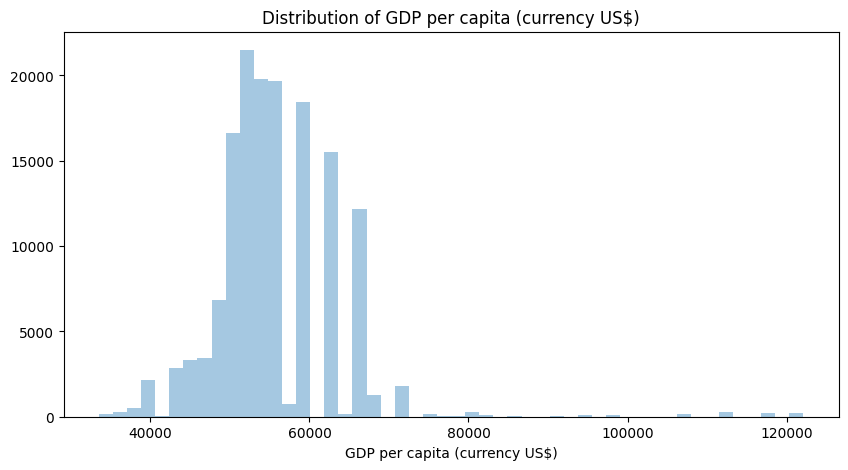

In [48]:
# Set the figure size
plt.figure(figsize=(10,5 ))
sns.distplot(df['GDP per capita (currency US$)'], kde=False)
plt.title('Distribution of GDP per capita (currency US$)')
# Show the plot
plt.show()

In [50]:
# Filter the rows to be removed based on the condition (backer_goal >= 0.6 * 10^8)
rows_to_remove =df.loc[df['GDP per capita (currency US$)'] >= 70000].index

# Drop the rows from the original DataFrame
df.drop(rows_to_remove, inplace=True)

# Optionally, you can reset the index of the DataFrame after dropping the rows
df.reset_index(drop=True, inplace=True)

In [51]:
# Filter the rows to be removed based on the condition (backer_goal >= 0.6 * 10^8)
rows_to_remove =df.loc[df['GDP per capita (currency US$)'] <= 40000].index

# Drop the rows from the original DataFrame
df.drop(rows_to_remove, inplace=True)

# Optionally, you can reset the index of the DataFrame after dropping the rows
df.reset_index(drop=True, inplace=True)

<AxesSubplot: xlabel='GDP per capita (currency US$)'>

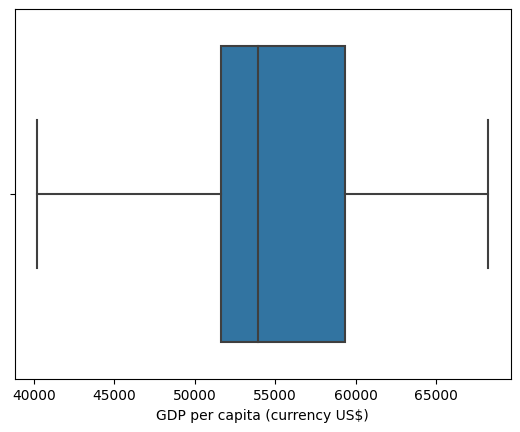

In [52]:
sns.boxplot(df['GDP per capita (currency US$)'])

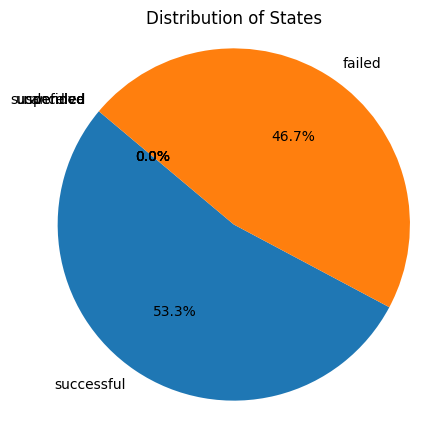

In [53]:
state_counts = df['state'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of States')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [54]:
df_numeric_features=df.select_dtypes(include=np.number)
df_numeric_features.columns

Index(['backers', 'usd_pledged', 'usd_goal', 'duration', 'backer_goal',
       'GDP per capita (currency US$)', 'employment rate', 'inflation rate',
       'usd_goal_iqr'],
      dtype='object')

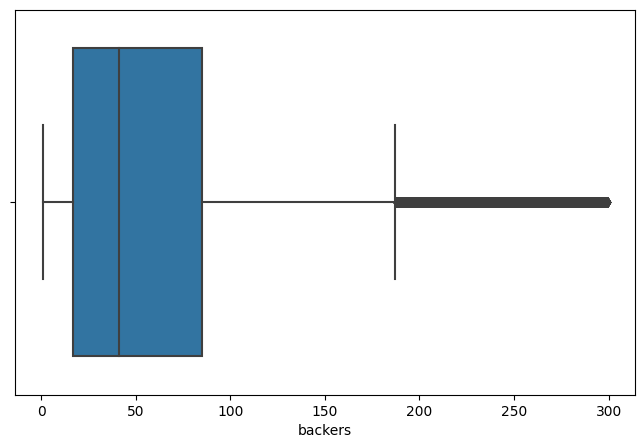

********************************************


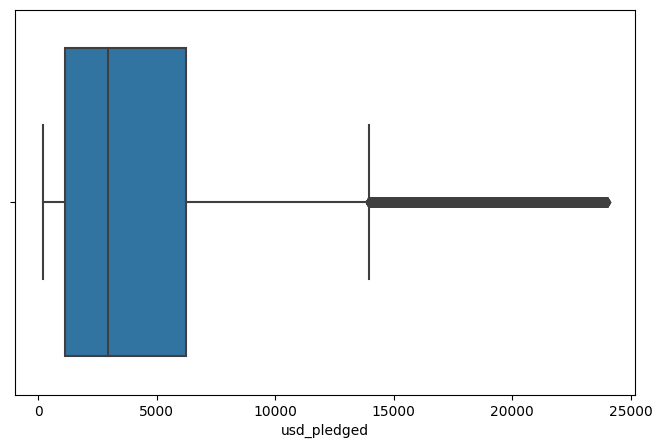

********************************************


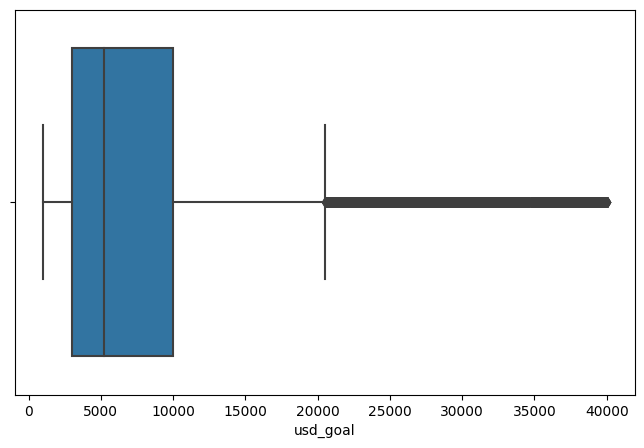

********************************************


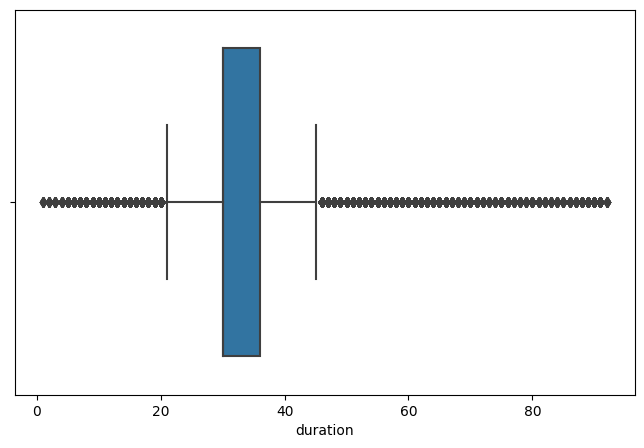

********************************************


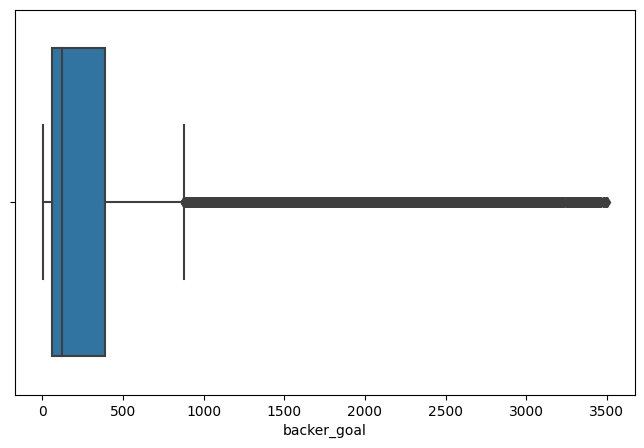

********************************************


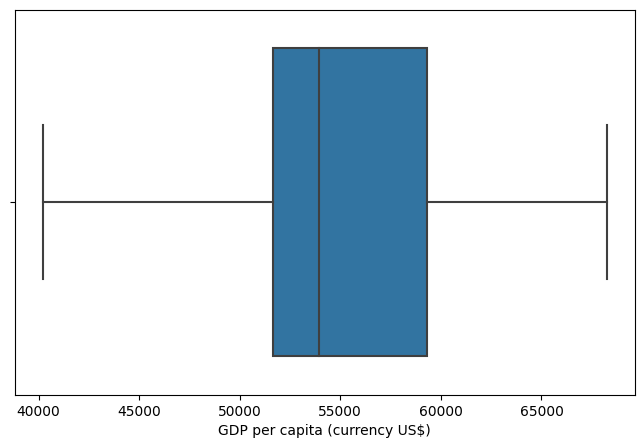

********************************************


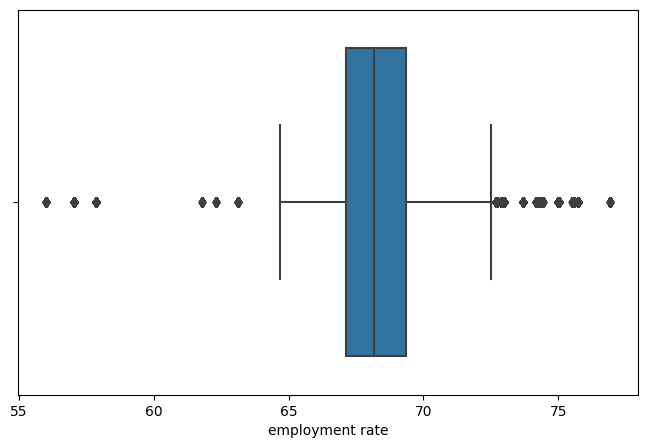

********************************************


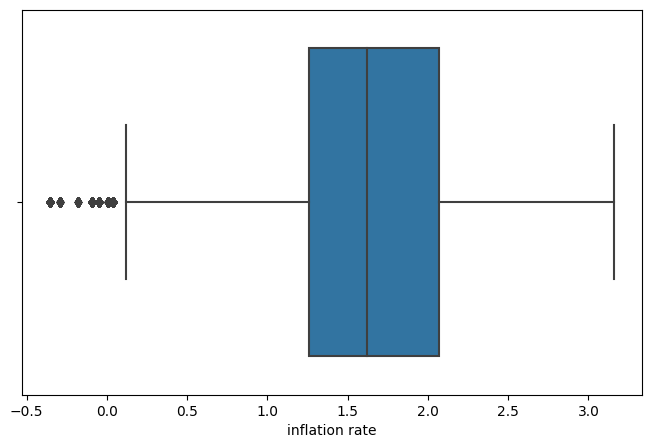

********************************************


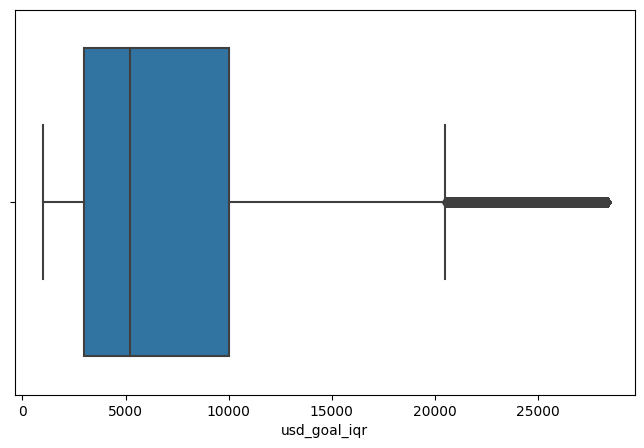

********************************************


In [55]:
for var in df_numeric_features.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(df[var])
    plt.show()
    
    print('***********'*4)

# Multi-collinearity

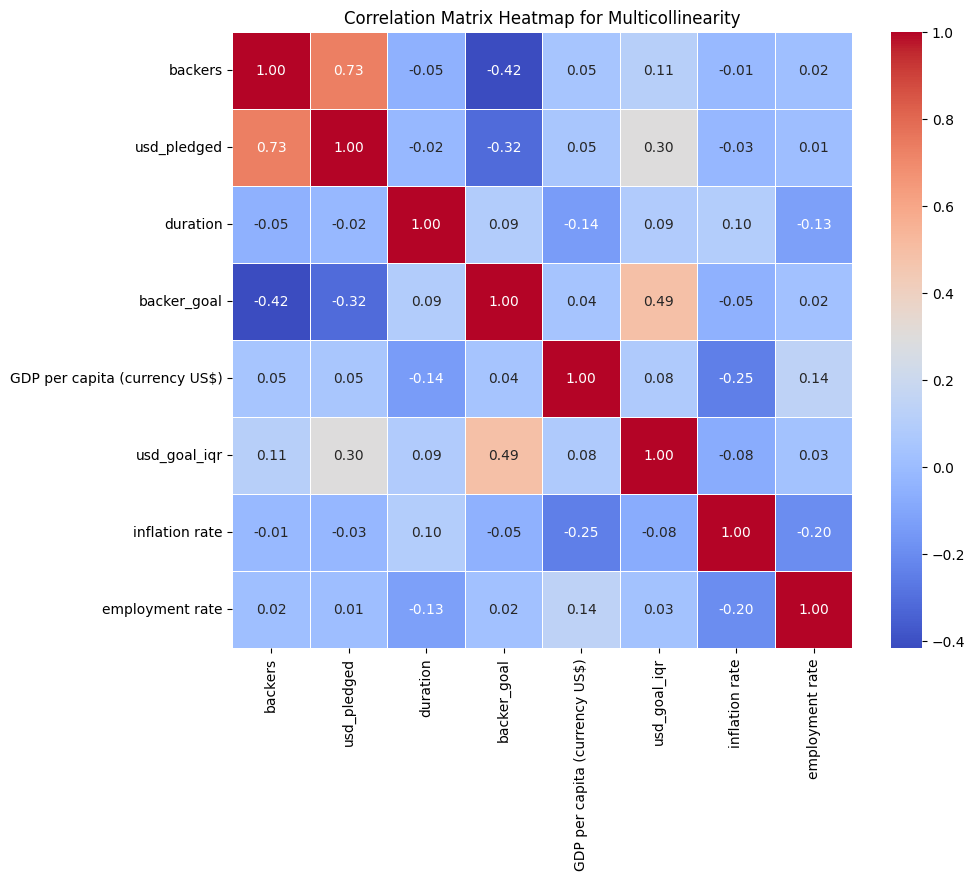

In [63]:
columns_for_analysis = ['backers', 'usd_pledged', 'duration', 'backer_goal', 'GDP per capita (currency US$)', 'usd_goal_iqr','inflation rate','employment rate']
correlation_matrix = df[columns_for_analysis].corr()
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap for Multicollinearity')
plt.show()

In [65]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Select the columns for which you want to calculate VIF
columns_for_vif = ['backers', 'usd_pledged', 'duration', 'backer_goal', 'GDP per capita (currency US$)', 'usd_goal_iqr','employment rate','inflation rate']

# Create a DataFrame containing only the selected columns
data_for_vif = df[columns_for_vif]

# Add a constant column for the intercept in the VIF calculation
data_for_vif = sm.add_constant(data_for_vif)

# Calculate VIF for each variable
vif = pd.DataFrame()
vif['Variable'] = data_for_vif.columns
vif['VIF'] = [variance_inflation_factor(data_for_vif.values, i) for i in range(data_for_vif.shape[1])]

# Display the VIF DataFrame
print(vif)

                        Variable          VIF
0                          const  1032.257099
1                        backers     2.346726
2                    usd_pledged     2.571990
3                       duration     1.052082
4                    backer_goal     2.017776
5  GDP per capita (currency US$)     1.096512
6                   usd_goal_iqr     1.884581
7                employment rate     1.060218
8                 inflation rate     1.103108


In [210]:
df2=pd.read_csv('18_Aug.csv')

# Univariate analysis

Analysis of Currency Column

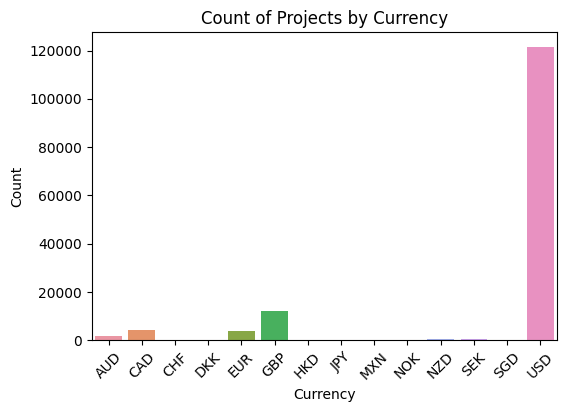

In [66]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='currency')
plt.title('Count of Projects by Currency')
plt.xlabel('Currency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Analysis of State-column

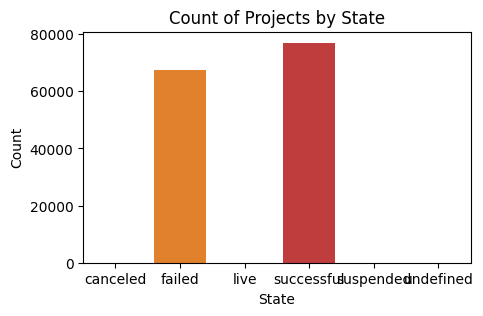

In [67]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='state')
plt.title('Count of Projects by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

Analysis of Country

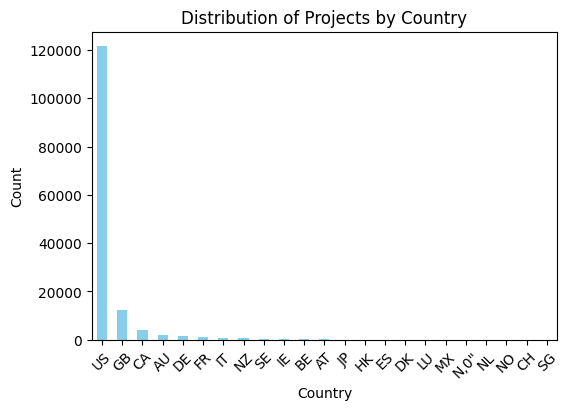

In [68]:
plt.figure(figsize=(6, 4))
df['country'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Projects by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Analysis of Quarter

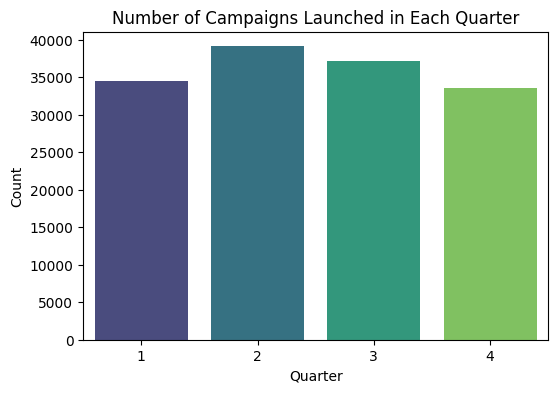

In [69]:
plt.figure(figsize=(6, 4))
sns.countplot(x='quarter', data=df, palette='viridis')
plt.title('Number of Campaigns Launched in Each Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.show()

Analysis of Major-Category

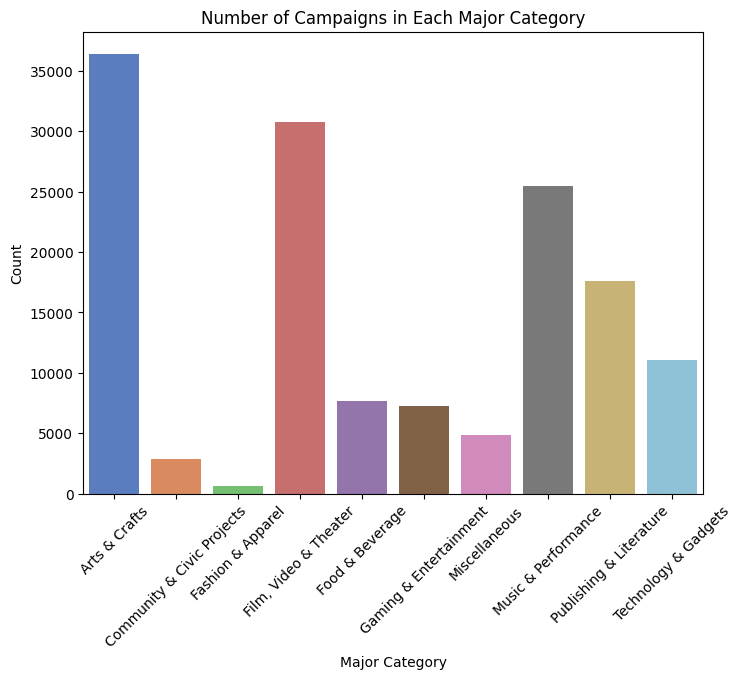

In [70]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Major Cat', data=df, palette='muted')
plt.title('Number of Campaigns in Each Major Category')
plt.xlabel('Major Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Analysis of GDP per capita (currency US$)

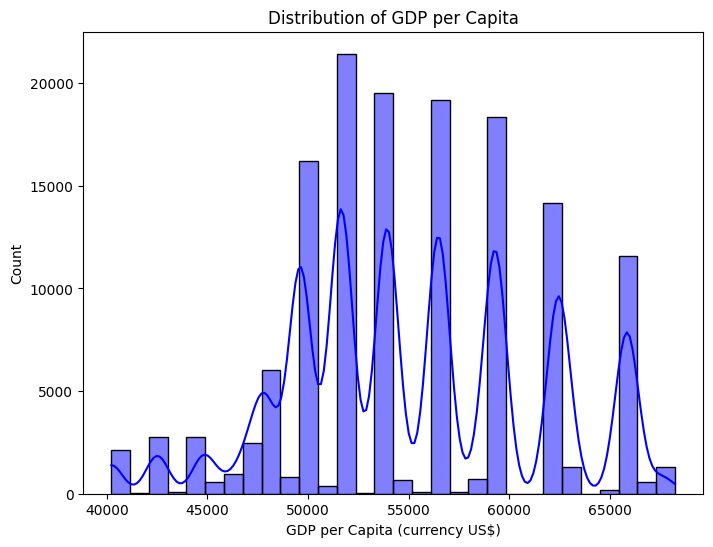

In [71]:
plt.figure(figsize=(8, 6))
sns.histplot(df['GDP per capita (currency US$)'], bins=30, kde=True, color='blue')
plt.title('Distribution of GDP per Capita')
plt.xlabel('GDP per Capita (currency US$)')
plt.ylabel('Count')
plt.show()

Analysis of Usd_goal

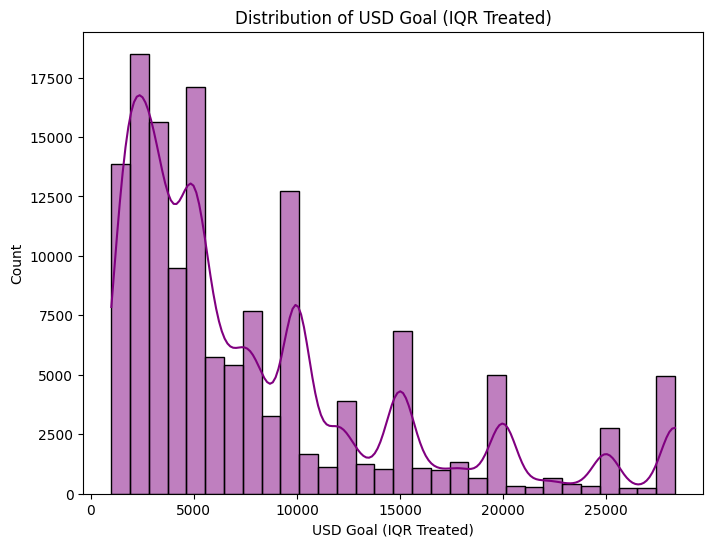

In [72]:
plt.figure(figsize=(8, 6))
sns.histplot(df['usd_goal_iqr'], bins=30, kde=True, color='purple')
plt.title('Distribution of USD Goal (IQR Treated)')
plt.xlabel('USD Goal (IQR Treated)')
plt.ylabel('Count')
plt.show()

Analysis of Usd_pledged

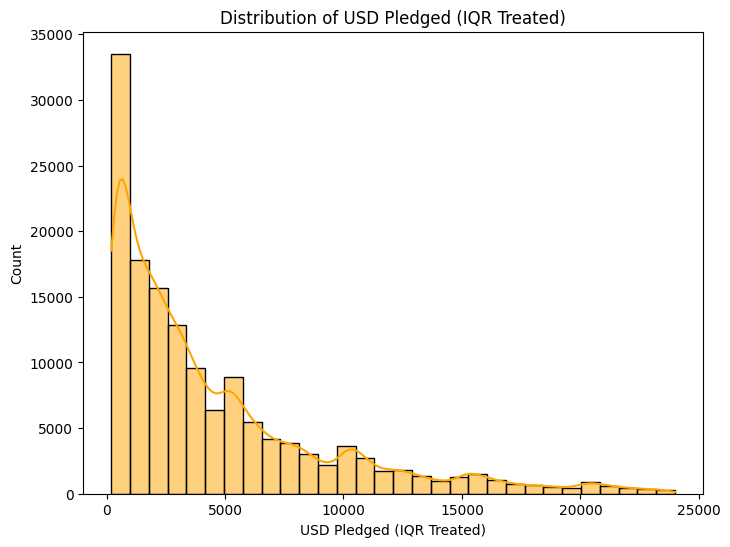

In [73]:
plt.figure(figsize=(8, 6))
sns.histplot(df['usd_pledged'], bins=30, kde=True, color='orange')
plt.title('Distribution of USD Pledged (IQR Treated)')
plt.xlabel('USD Pledged (IQR Treated)')
plt.ylabel('Count')
plt.show()

Analysis of Backers-column

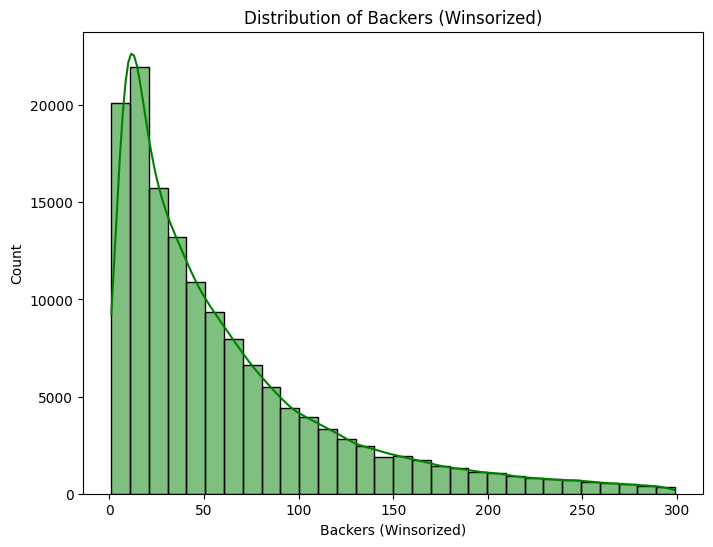

In [75]:
plt.figure(figsize=(8, 6))
sns.histplot(df['backers'], bins=30, kde=True, color='green')
plt.title('Distribution of Backers (Winsorized)')
plt.xlabel('Backers (Winsorized)')
plt.ylabel('Count')
plt.show()

Analysis of Days

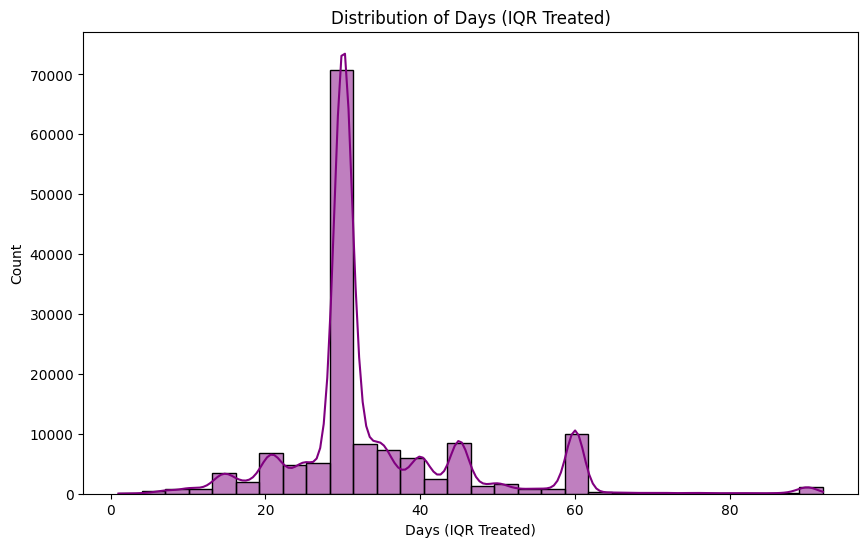

In [77]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=30, kde=True, color='purple')
plt.title('Distribution of Days (IQR Treated)')
plt.xlabel('Days (IQR Treated)')
plt.ylabel('Count')
plt.show()

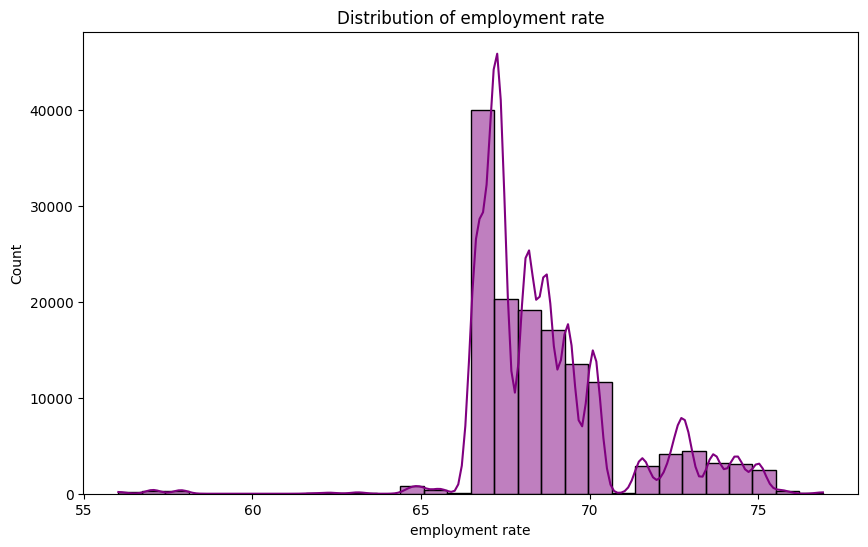

In [78]:
plt.figure(figsize=(10, 6))
sns.histplot(df['employment rate'], bins=30, kde=True, color='purple')
plt.title('Distribution of employment rate')
plt.xlabel('employment rate')
plt.ylabel('Count')
plt.show()

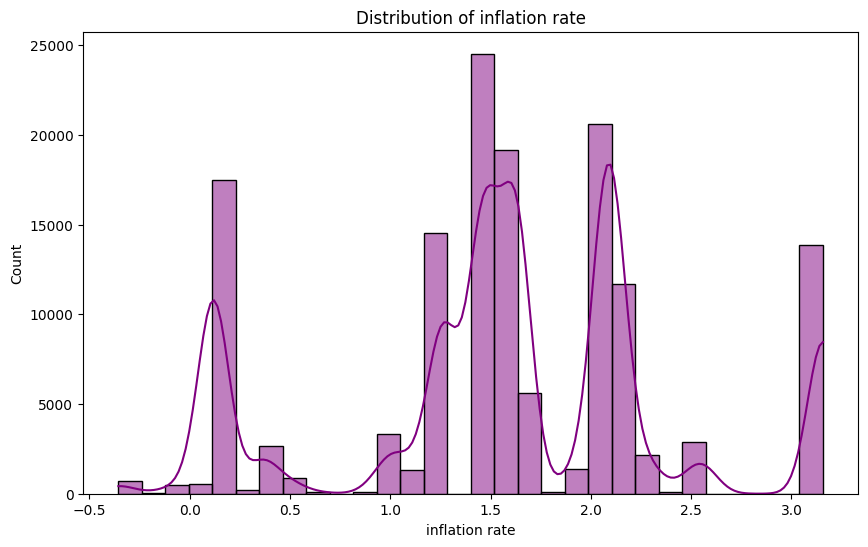

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(df['inflation rate'], bins=30, kde=True, color='purple')
plt.title('Distribution of inflation rate')
plt.xlabel('inflation rate')
plt.ylabel('Count')
plt.show()

# Bivariate analysis Between Target and Dependent Variables

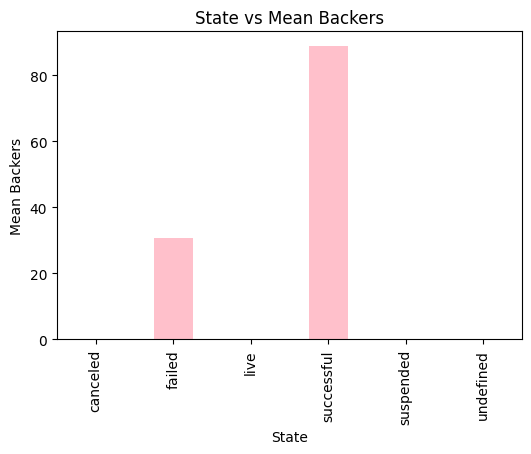

In [80]:
backers_mean_by_state = df.groupby('state')['backers'].mean()

# Plot a bar chart to visualize the mean number of backers for each state
backers_mean_by_state.plot(kind='bar', color='pink', figsize=(6, 4))
plt.title('State vs Mean Backers')
plt.xlabel('State')
plt.ylabel('Mean Backers')
plt.show()

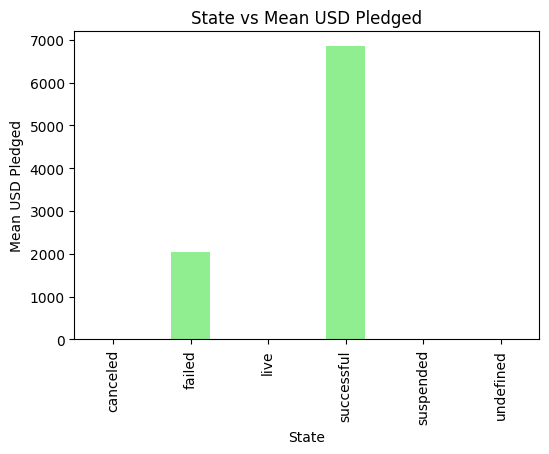

In [81]:
usd_pledged_mean_by_state = df.groupby('state')['usd_pledged'].mean()

# Plot a bar chart to visualize the mean USD pledged for each state
usd_pledged_mean_by_state.plot(kind='bar', color='lightgreen', figsize=(6, 4))
plt.title('State vs Mean USD Pledged')
plt.xlabel('State')
plt.ylabel('Mean USD Pledged')
plt.show()

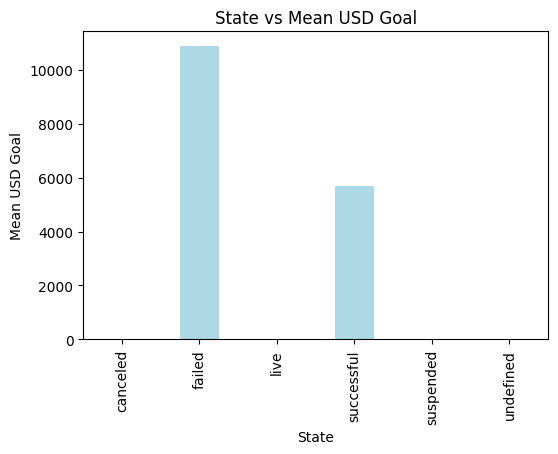

In [82]:
usd_goal_mean_by_state = df.groupby('state')['usd_goal_iqr'].mean()

# Plot a bar chart to visualize the mean USD goal for each state
usd_goal_mean_by_state.plot(kind='bar', color='lightblue', figsize=(6, 4))
plt.title('State vs Mean USD Goal')
plt.xlabel('State')
plt.ylabel('Mean USD Goal')
plt.show()

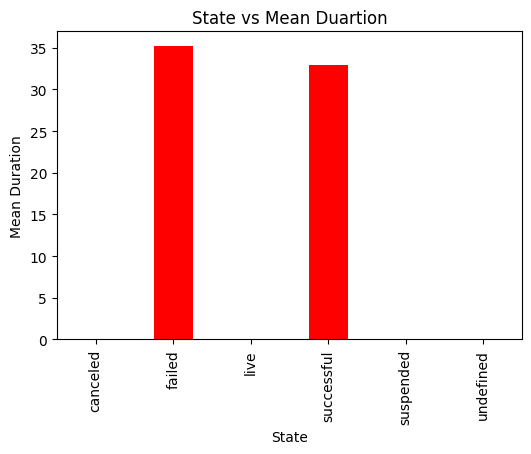

In [85]:
days_mean_by_state = df.groupby('state')['duration'].mean()

# Plot a bar chart to visualize the mean days for each state
days_mean_by_state.plot(kind='bar', color='red', figsize=(6, 4))
plt.title('State vs Mean Duartion')
plt.xlabel('State')
plt.ylabel('Mean Duration')
plt.show()

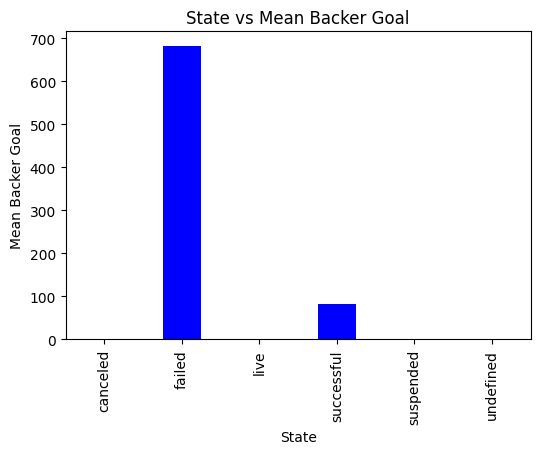

In [86]:
backer_goal_mean_by_state = df.groupby('state')['backer_goal'].mean()

# Plot a bar chart to visualize the mean backer_goal for each state
backer_goal_mean_by_state.plot(kind='bar', color='blue', figsize=(6, 4))
plt.title('State vs Mean Backer Goal')
plt.xlabel('State')
plt.ylabel('Mean Backer Goal')
plt.show()

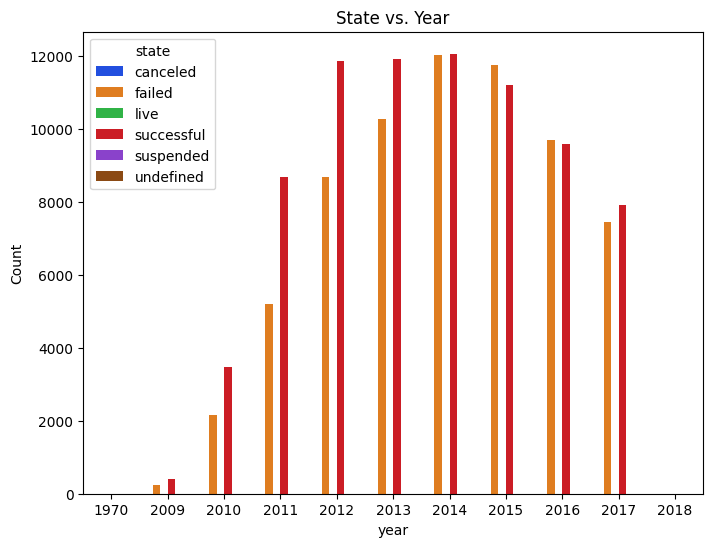

In [191]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='year', hue='state', palette='bright')
plt.title('State vs. Year')
plt.xlabel('year')
plt.ylabel('Count')
plt.show()

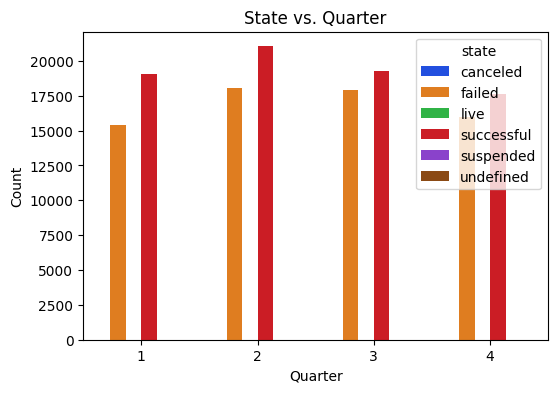

In [192]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='quarter', hue='state', palette='bright')
plt.title('State vs. Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.show()

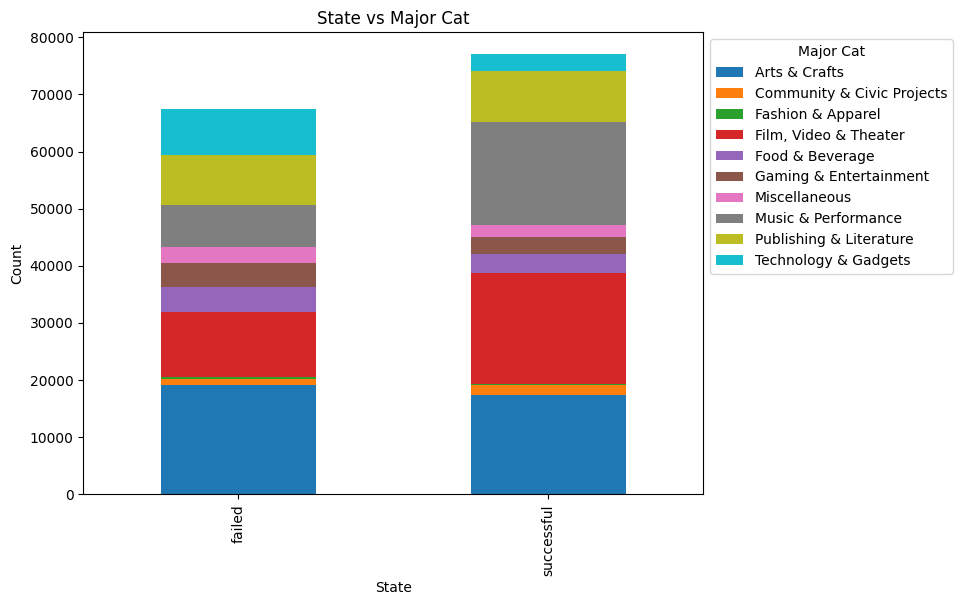

In [193]:
state_vs_major_cat_crosstab = pd.crosstab(df['state'], df['Major Cat'])

# Plot a stacked bar chart to visualize the distribution of states across different major categories
state_vs_major_cat_crosstab.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('State vs Major Cat')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Major Cat', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

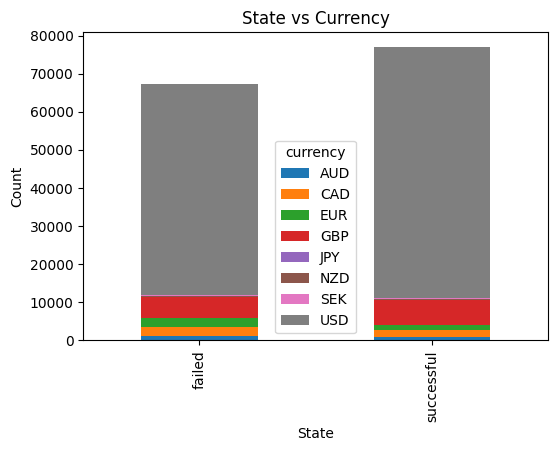

In [194]:
cross_tab = pd.crosstab(df['state'], df['currency'])

# Plot a stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(6, 4))
plt.title('State vs Currency')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

# Bivariate Analysis

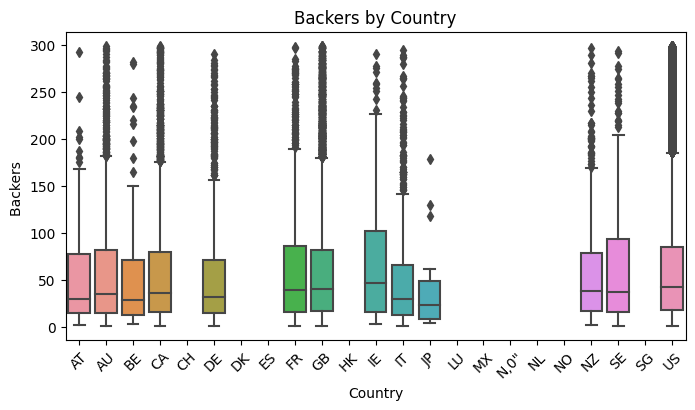

In [196]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='country', y='backers', data=df)
plt.title('Backers by Country')
plt.xlabel('Country')
plt.ylabel('Backers ')
plt.xticks(rotation=45)
plt.show()

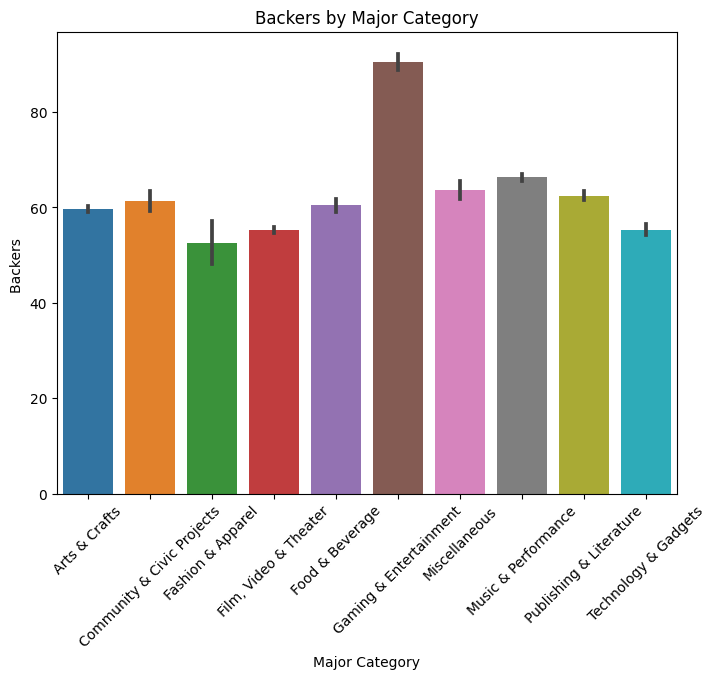

In [197]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Major Cat', y='backers', data=df)
plt.title('Backers by Major Category')
plt.xlabel('Major Category')
plt.ylabel('Backers ')
plt.xticks(rotation=45)
plt.show()

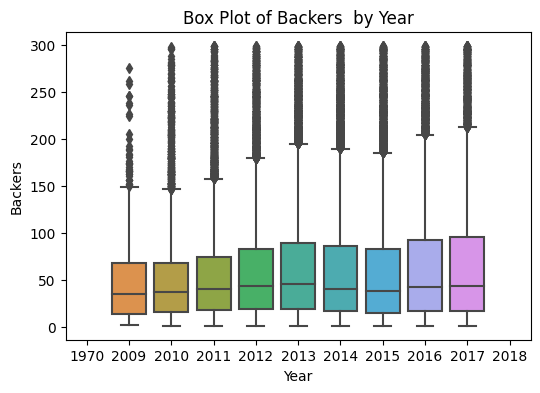

In [198]:
# Create a box plot to visualize the distribution of backers_winsorized for each year
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='year', y='backers')
plt.title('Box Plot of Backers  by Year')
plt.xlabel('Year')
plt.ylabel('Backers')
plt.show()

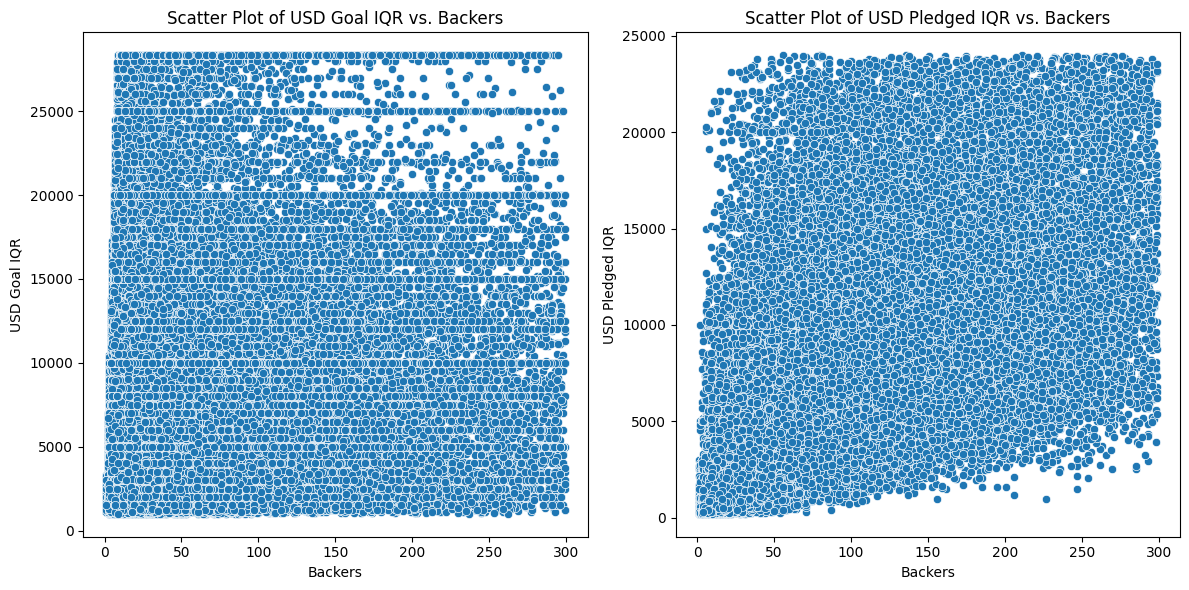

In [199]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for 'usd_goal_iqr' vs. 'backers'
sns.scatterplot(data=df, x='backers', y='usd_goal_iqr', ax=axes[0])
axes[0].set_title('Scatter Plot of USD Goal IQR vs. Backers')
axes[0].set_xlabel('Backers')
axes[0].set_ylabel('USD Goal IQR')

# Scatter plot for 'usd_pledged_iqr' vs. 'backers'
sns.scatterplot(data=df, x='backers', y='usd_pledged', ax=axes[1])
axes[1].set_title('Scatter Plot of USD Pledged IQR vs. Backers')
axes[1].set_xlabel('Backers')
axes[1].set_ylabel('USD Pledged IQR')

plt.tight_layout()  # To avoid overlapping of plot elements
plt.show()

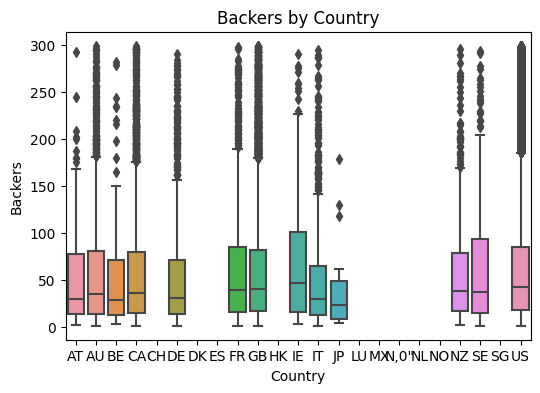

In [200]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='country', y='backers', data=df)
plt.title('Backers by Country')
plt.xlabel('Country')
plt.ylabel('Backers')
plt.show()

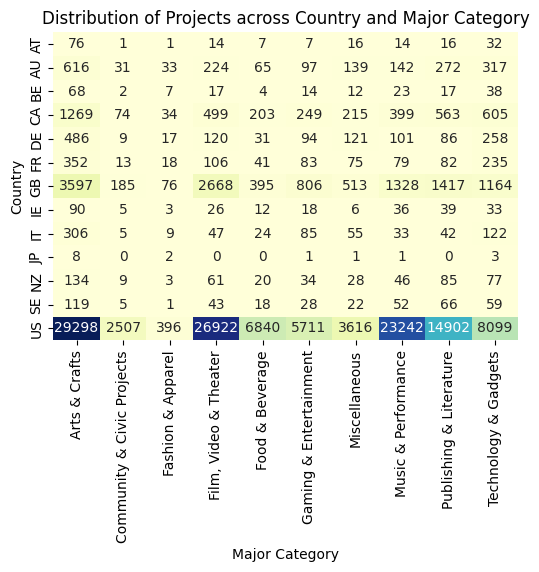

In [201]:
contingency_table = pd.crosstab(df['country'], df['Major Cat'])

# Create a stacked bar chart
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title('Distribution of Projects across Country and Major Category')
plt.xlabel('Major Category')
plt.ylabel('Country')
plt.show()

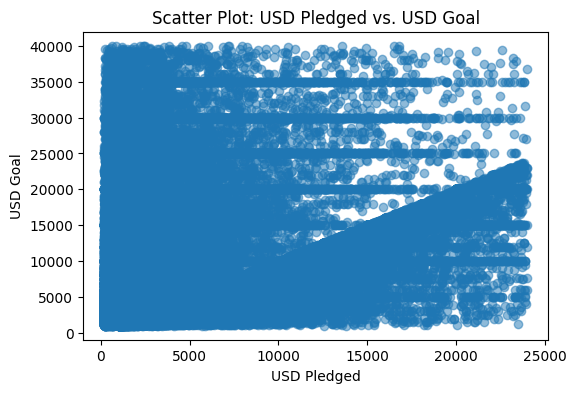

In [202]:
# Create a scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(df['usd_pledged'], df['usd_goal'], alpha=0.5)
plt.title('Scatter Plot: USD Pledged vs. USD Goal')
plt.xlabel('USD Pledged')
plt.ylabel('USD Goal')
plt.show()

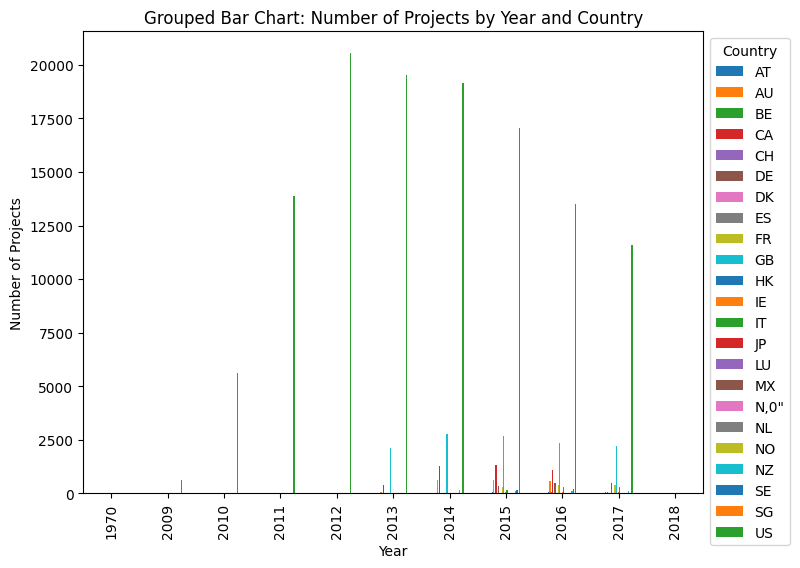

In [203]:
# Group the data by 'year' and 'country' and count the number of projects in each group
grouped_data = df.groupby(['year', 'country']).size().reset_index(name='count')

# Pivot the data to create a grouped bar chart
pivot_data = grouped_data.pivot(index='year', columns='country', values='count')

# Create the grouped bar chart
pivot_data.plot(kind='bar', figsize=(8, 6))
plt.title('Grouped Bar Chart: Number of Projects by Year and Country')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.legend(title='Country', bbox_to_anchor=(1, 1))
plt.show()

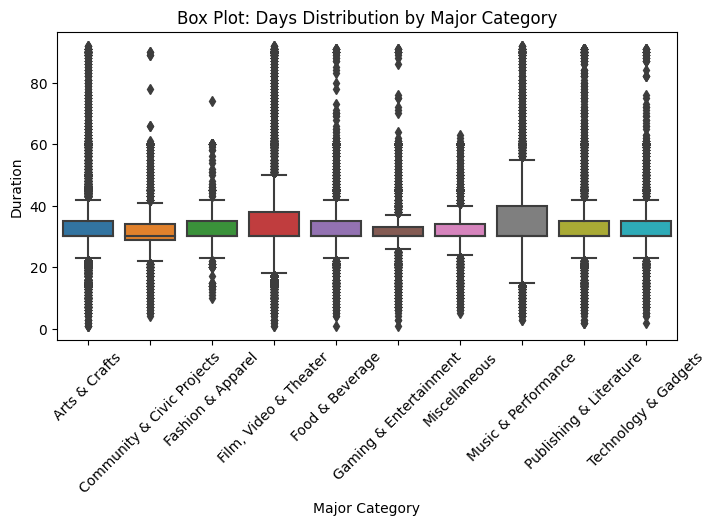

In [87]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Major Cat', y='duration', data=df)
plt.title('Box Plot: Days Distribution by Major Category')
plt.xlabel('Major Category')
plt.ylabel('Duration')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#HeatMaps to get an clear understanding of categorical features

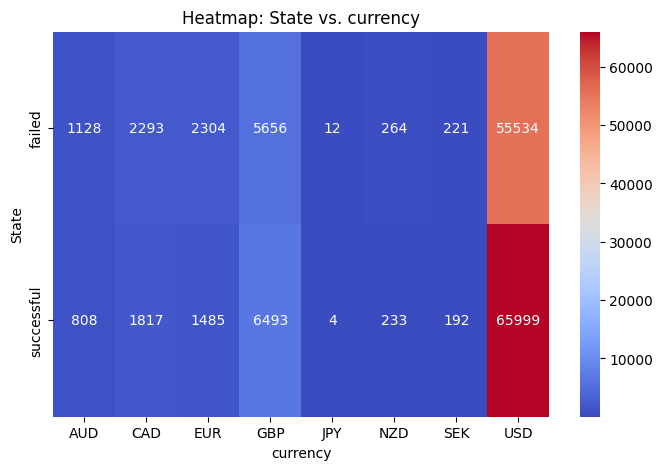

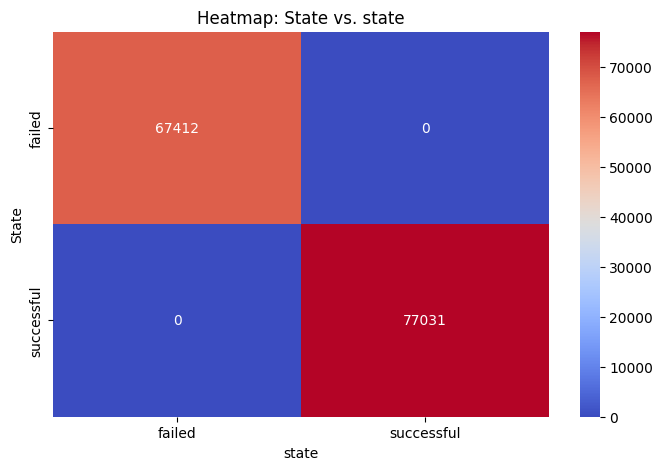

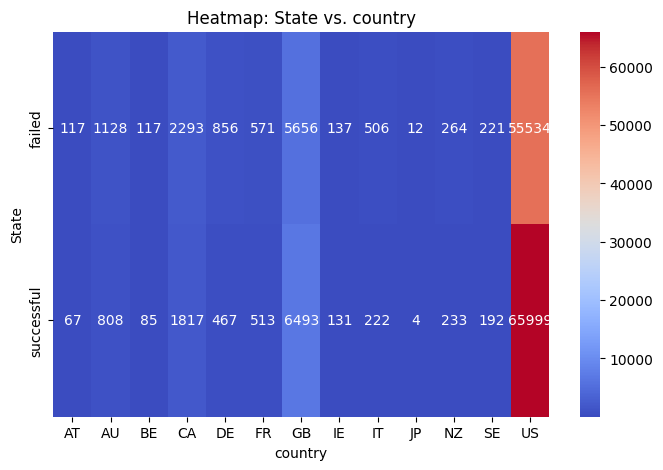

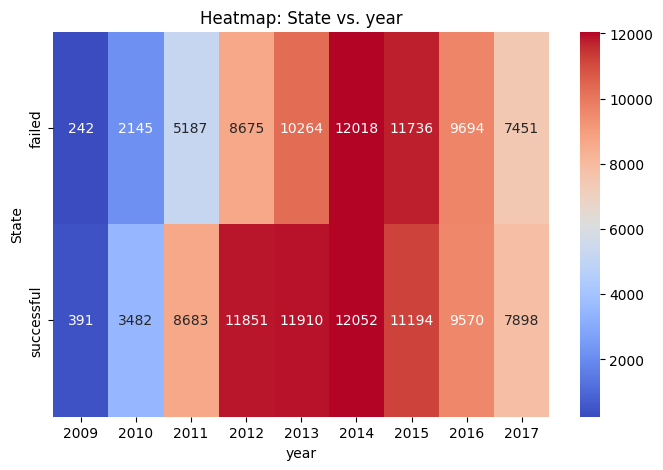

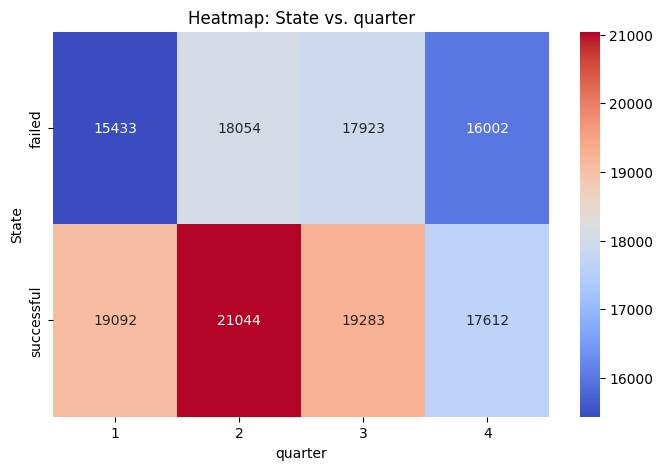

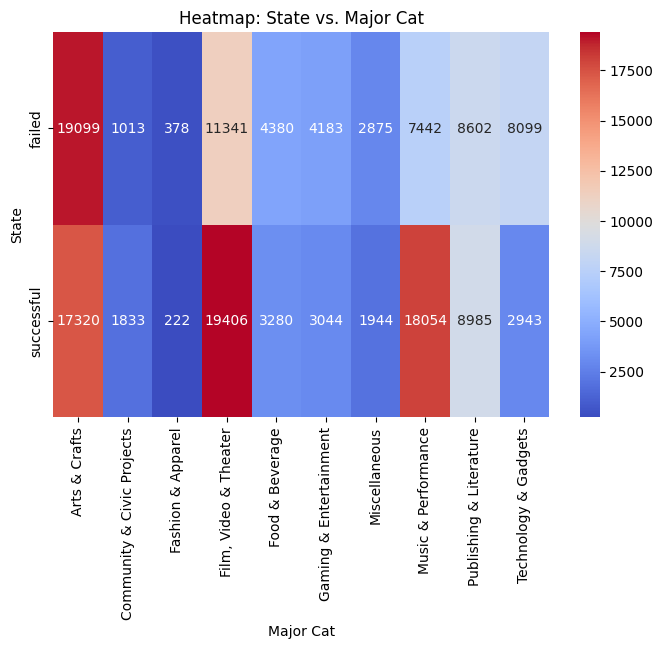

In [88]:
# Get the list of categorical columns
categorical_columns = df.select_dtypes(include=['category']).columns.tolist()

# Create a separate heatmap for each categorical column
for cat_col in categorical_columns:
    # Create a crosstabulation of state vs. the current categorical column
    crosstab_data = pd.crosstab(df['state'], df[cat_col])
    
    # Create the heatmap
    plt.figure(figsize=(8, 5))
    sns.heatmap(crosstab_data, cmap='coolwarm', annot=True, fmt='d', cbar=True)
    plt.title(f'Heatmap: State vs. {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel('State')
    plt.show()

In [ ]:
#Analysis of launched and deadline column

In [89]:
df_kick=df.copy()

In [90]:
# Drop rows where 'state' is neither 'failed' nor 'successful'
df_kick.drop(df_kick[~df_kick['state'].isin(['failed', 'successful'])].index, inplace=True)

In [91]:
df_kick['launched'] = pd.to_datetime(df_kick['launched'])
df_kick['launched_date'] = df_kick['launched'].dt.date

df_kick['deadline'] = pd.to_datetime(df_kick['deadline'])
df_kick['deadline_date'] = df_kick['deadline'].dt.date

In [214]:
#Creating a new columns with Campaign total months
df_kick['time_campaign_d'] = (df_kick['deadline_date'] - df_kick['launched_date']).dt.days
df_kick['time_campaign_d'] = df_kick['time_campaign_d'].astype(int)

#removing outlier value
df_kick = df_kick[df_kick['time_campaign_d'] != 14867]

df_kick['time_campaign'] = round(df_kick['time_campaign_d'] / 30 )

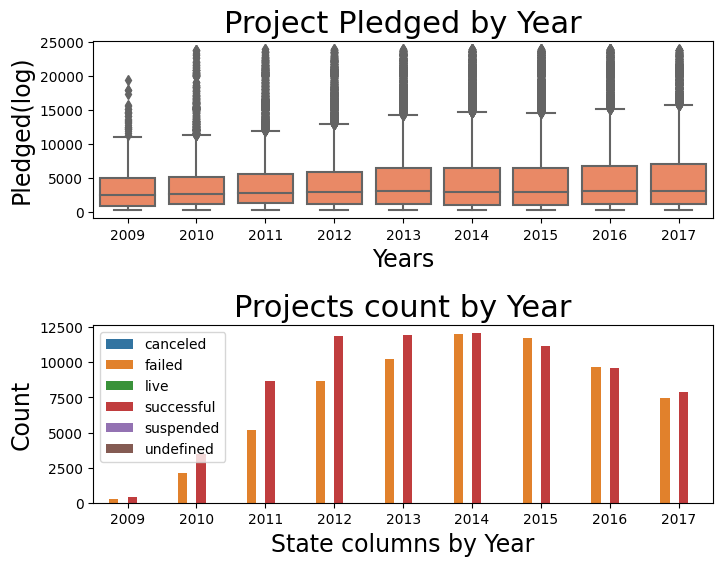

In [216]:
df_kick['laun_month_year'] = df_kick.launched.dt.month
df_kick['laun_year'] = df_kick.launched.dt.year
year = df_kick.laun_year.value_counts()
month = df_kick.laun_month_year.value_counts()

fig, ax = plt.subplots(2,1, figsize=(8,6))

plt.subplot(211)
ax1 = sns.boxplot(x="laun_year", y='usd_pledged', 
                  data=df_kick, color='coral')
ax1.set_title("Project Pledged by Year", fontsize=22)
ax1.set_xlabel("Years", fontsize=17)
ax1.set_ylabel("Pledged(log)", fontsize=17)

plt.subplot(212)
ax2 = sns.countplot(x="laun_year", hue='state', 
                    data=df_kick )
ax2.set_title("Projects count by Year", fontsize=22)
ax2.set_xlabel("State columns by Year", fontsize=17)
ax2.set_ylabel("Count", fontsize=17)
ax2.legend(loc='upper left')
plt.subplots_adjust(hspace = 0.6)
plt.show()

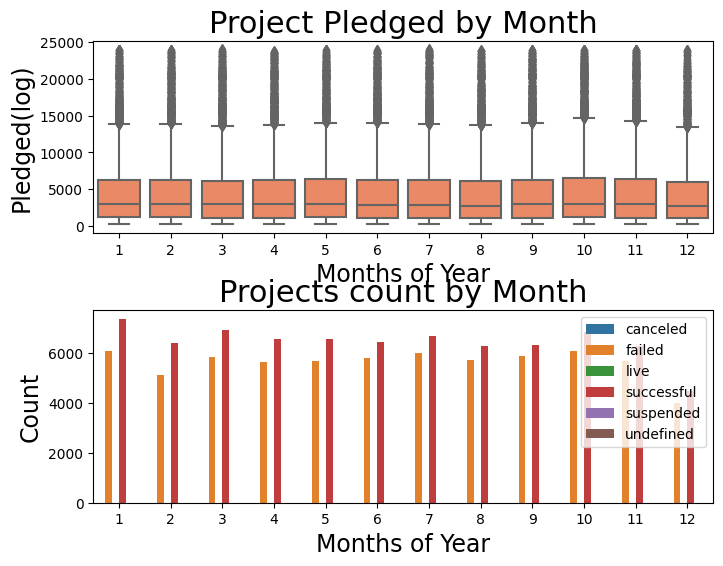

In [217]:
fig, ax = plt.subplots(2,1, figsize=(8,6))

plt.subplot(211)
ax1 = sns.boxplot(x="laun_month_year", y='usd_pledged', 
                  data=df_kick, color='coral')
ax1.set_title("Project Pledged by Month", fontsize=22)
ax1.set_xlabel("Months of Year", fontsize=17)
ax1.set_ylabel("Pledged(log)", fontsize=17)

plt.subplot(212)
ax2 = sns.countplot(x="laun_month_year", hue='state', 
                    data=df_kick )
ax2.set_title("Projects count by Month", fontsize=22)
ax2.set_xlabel("Months of Year", fontsize=17)
ax2.set_ylabel("Count", fontsize=17)
ax2.legend(loc='upper right')

plt.subplots_adjust(hspace = 0.4)

plt.show()

# Transformations on required columns

Transformation of usd_goal_iqr by boxcox

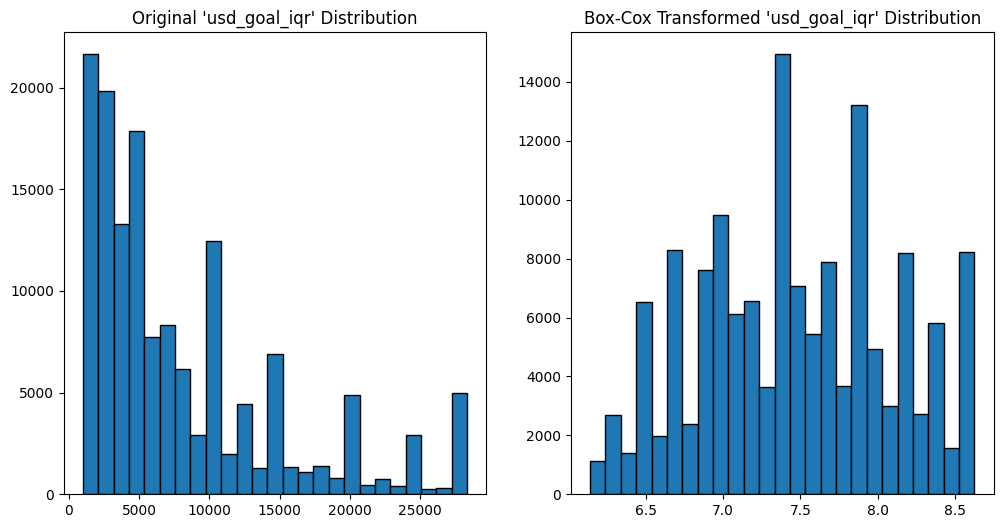

In [93]:
from scipy.stats import boxcox
# Perform the Box-Cox transformation
df['usd_goal_transformed'], lambda_usd_goal_iqr = boxcox(df['usd_goal_iqr'])  # Adding 1 to avoid non-positive values

# Plot the original and transformed distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['usd_goal_iqr'], bins=25, edgecolor='k')
plt.title("Original 'usd_goal_iqr' Distribution")

plt.subplot(1, 2, 2)
plt.hist(df['usd_goal_transformed'], bins=25, edgecolor='k')
plt.title("Box-Cox Transformed 'usd_goal_iqr' Distribution")
plt.show()

In [96]:
from scipy.stats import skew
skewness = skew(df['usd_goal_transformed'])

print("Skewness of 'usd_goal_transformed' column:", skewness)

Skewness of 'usd_goal_transformed' column: 0.008722525826063105


Transformation of usd_pledged by boxcox

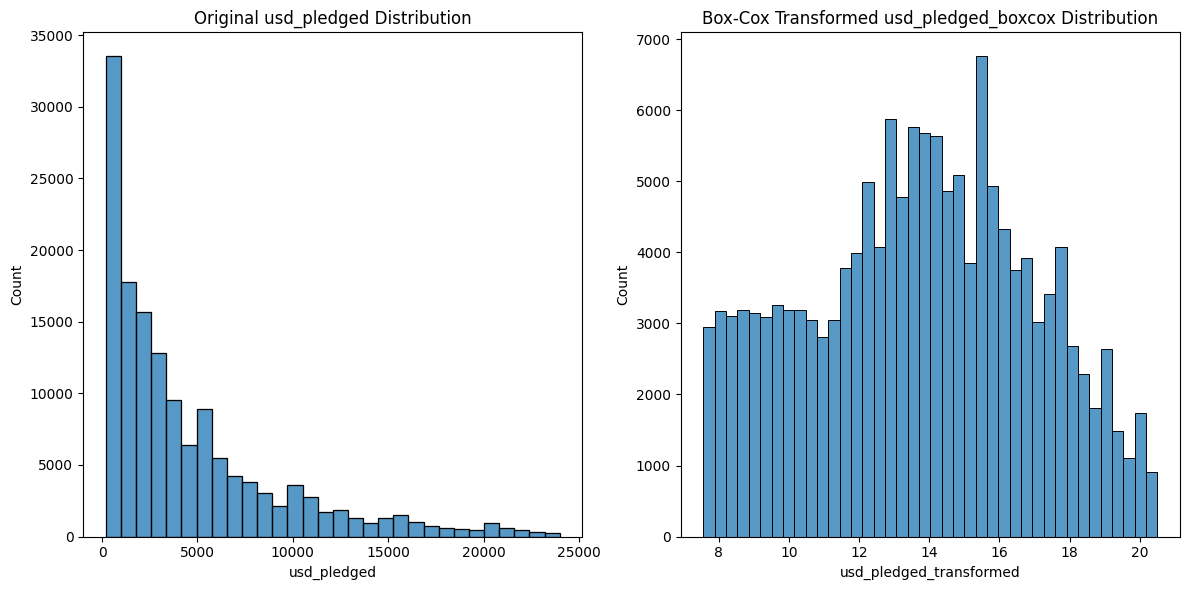

In [97]:
# Apply Box-Cox transformation to usd_pledged column
df['usd_pledged_transformed'], _ = boxcox(df['usd_pledged'])

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot original usd_pledged distribution
sns.histplot(df['usd_pledged'], ax=axes[0],bins=30)
axes[0].set_title('Original usd_pledged Distribution')

# Plot Box-Cox transformed usd_pledged_boxcox distribution
sns.histplot(df['usd_pledged_transformed'], ax=axes[1],bins=40)
axes[1].set_title('Box-Cox Transformed usd_pledged_boxcox Distribution')

plt.tight_layout()
plt.show()


In [98]:
skewness_pledged = skew(df['usd_pledged_transformed'])
print("Skewness of 'usd_pledged_transformed' column:", skewness_pledged)

Skewness of 'usd_pledged_transformed' column: -0.043542580292939274


Transformation of backers column by box-cox

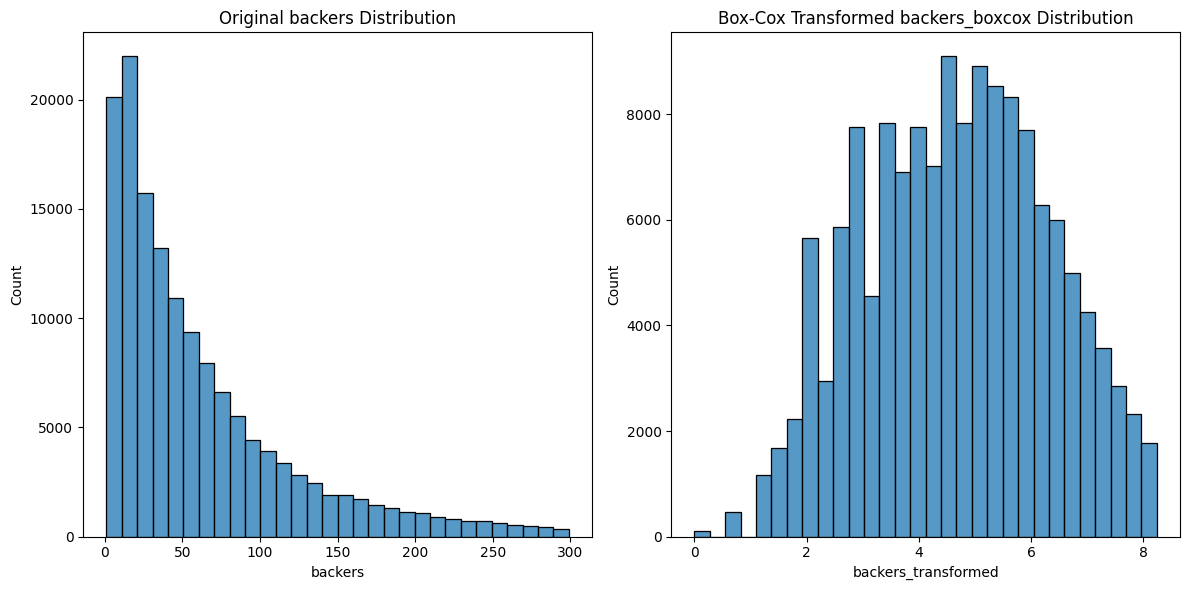

In [99]:
# Apply Box-Cox transformation to usd_pledged column
df['backers_transformed'], _ = boxcox(df['backers'])

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot original usd_pledged distribution
sns.histplot(df['backers'], ax=axes[0],bins=30)
axes[0].set_title('Original backers Distribution')

# Plot Box-Cox transformed usd_pledged_boxcox distribution
sns.histplot(df['backers_transformed'], ax=axes[1],bins=30)
axes[1].set_title('Box-Cox Transformed backers_boxcox Distribution')

plt.tight_layout()
plt.show()

In [100]:
skewness_backers = skew(df['backers_transformed'])
print("Skewness of 'backers_transformed' column:", skewness_backers)

Skewness of 'backers_transformed' column: -0.031374406319723255


In [ ]:
Transformation of backer_goal by log

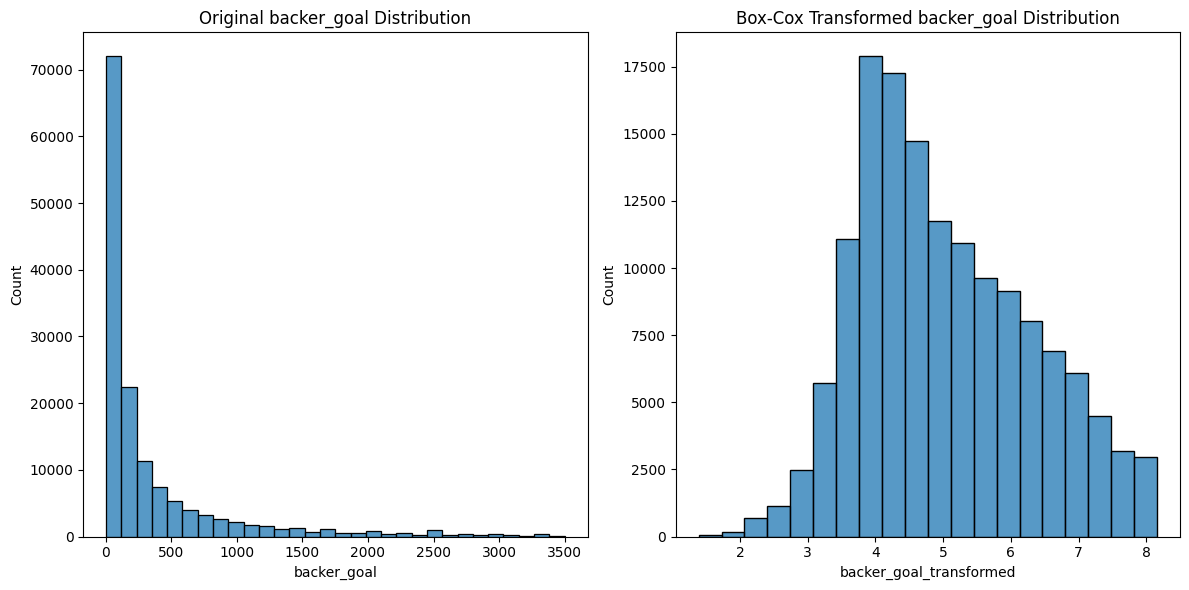

In [101]:
# Apply Box-Cox transformation to 'backer_goal' column
df['backer_goal_transformed'] = np.log(df['backer_goal'])  # Adding 1 to handle non-positive values

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot original 'backer_goal' distribution
sns.histplot(df['backer_goal'], ax=axes[0], bins=30)
axes[0].set_title('Original backer_goal Distribution')

# Plot Box-Cox transformed 'backer_goal_transformed' distribution
sns.histplot(df['backer_goal_transformed'], ax=axes[1], bins=20)
axes[1].set_title('Box-Cox Transformed backer_goal Distribution')

plt.tight_layout()
plt.show()


In [102]:
skewness_backer_goal = skew(df['backer_goal_transformed'])
print("Skewness of 'backer_goal_transformed' column:", skewness_backer_goal)

Skewness of 'backer_goal_transformed' column: 0.4036960964836014


In [ ]:
Transformation of days column by square root

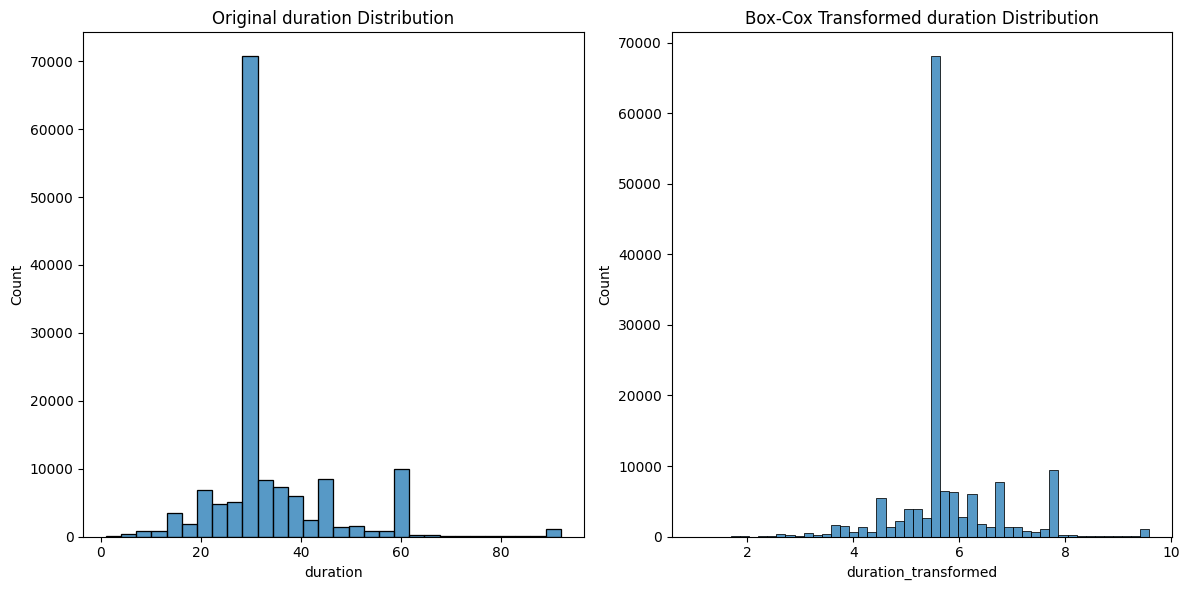

In [105]:
# Apply Box-Cox transformation to 'days' column
df['duration_transformed']= np.sqrt(df['duration'])  # Adding 1 to handle non-positive values

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot original 'days' distribution
sns.histplot(df['duration'], ax=axes[0], bins=30)
axes[0].set_title('Original duration Distribution')

# Plot Box-Cox transformed 'days_transformed' distribution
sns.histplot(df['duration_transformed'], ax=axes[1], bins=50)
axes[1].set_title('Box-Cox Transformed duration Distribution')

plt.tight_layout()
plt.show()


In [106]:
skewness_days = skew(df['duration_transformed'])
print("Skewness of 'duration_transformed' column:", skewness_days)

Skewness of 'duration_transformed' column: 0.7484464161131614


# Normality check

In [107]:
from scipy.stats import shapiro

In [108]:
statistic, p_value = shapiro(df['usd_goal_transformed'])

# Print the results
print("Shapiro-Wilk Test for 'usd_goal_transformed':")
print("Test Statistic:", statistic)
print("P-value:", p_value)
# Check if the data looks approximately Gaussian (normal)
alpha = 0.05
if p_value > alpha:
    print("Normal Distribution(fail to reject H0)")
else:
    print("Non-Normal Distribution(reject H0)")

Shapiro-Wilk Test for 'usd_goal_transformed':
Test Statistic: 0.9767816662788391
P-value: 0.0
Non-Normal Distribution(reject H0)


In [109]:
statistic, p_value = shapiro(df['usd_pledged_transformed'])

# Check if the column is normal or not
if p_value > 0.05:
    print("The 'usd_pledged_transformed column is normally distributed.")
else:
    print("The 'usd_pledged_transformed' column is not normally distributed.")

The 'usd_pledged_transformed' column is not normally distributed.


In [110]:
statistic, p_value = shapiro(df['backers_transformed'])

# Check if the column is normal or not
if p_value > 0.05:
    print("The 'backers_transformed' column is normally distributed.")
else:
    print("The 'backers_transformed' column is not normally distributed.")

The 'backers_transformed' column is not normally distributed.


In [111]:
statistic, p_value = shapiro(df['backer_goal_transformed'])

# Check if the column is normal or not
if p_value > 0.05:
    print("The 'backer_goal_transformed' column is normally distributed.")
else:
    print("The 'backer_goal_transformed' column is not normally distributed.")

The 'backer_goal_transformed' column is not normally distributed.


In [112]:
statistic, p_value = shapiro(df['days_transformed'])

# Check if the column is normal or not
if p_value > 0.05:
    print("The 'days_transformed' column is normally distributed.")
else:
    print("The 'days_transformed' column is not normally distributed.")

The 'days_transformed' column is not normally distributed.


In [113]:
statistic, p_value = shapiro(df['GDP per capita (currency US$)'])

# Check if the column is normal or not
if p_value > 0.05:
    print("The 'GDP per capita (currency US$)' column is normally distributed.")
else:
    print("The 'GDP per capita (currency US$)' column is not normally distributed.")

The 'GDP per capita (currency US$)' column is not normally distributed.


# Spearman Correlation test

In [114]:
# Select the numeric columns for correlation analysis
numeric_columns = ['GDP per capita (currency US$)','usd_goal_transformed', 'usd_pledged_transformed', 'backers_transformed', 'backer_goal_transformed', 'duration_transformed','employment rate','inflation rate']

# Calculate Spearman correlation coefficients
spearman_corr = df[numeric_columns].corr(method='spearman')

print("\nSpearman Correlation Matrix:")
spearman_corr


Spearman Correlation Matrix:


,GDP per capita (currency US$),usd_goal_transformed,usd_pledged_transformed,backers_transformed,backer_goal_transformed,duration_transformed,employment rate,inflation rate
GDP per capita (currency US$),1.000000,0.100138,0.034415,0.021318,0.055185,-0.122382,0.488892,-0.301198
usd_goal_transformed,0.100138,1.000000,0.272155,0.127937,0.554315,0.141101,0.065964,-0.075226
usd_pledged_transformed,0.034415,0.272155,1.000000,0.842234,-0.490411,-0.017202,0.004825,-0.005602
backers_transformed,0.021318,0.127937,0.842234,1.000000,-0.730619,-0.034855,0.002932,0.004966
backer_goal_transformed,0.055185,0.554315,-0.490411,-0.730619,1.000000,0.124155,0.047007,-0.058210
duration_transformed,-0.122382,0.141101,-0.017202,-0.034855,0.124155,1.000000,-0.155465,0.084500
employment rate,0.488892,0.065964,0.004825,0.002932,0.047007,-0.155465,1.000000,-0.400340
inflation rate,-0.301198,-0.075226,-0.005602,0.004966,-0.058210,0.084500,-0.400340,1.000000


# Statistical tests for categorical variable

In [115]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming your DataFrame is named 'df'

# Select the categorical variables and the target variable
categorical_columns = ['currency', 'Major Cat', 'country', 'quarter']
target_column = 'state'

# Create contingency tables
contingency_tables = []
for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df[target_column])
    contingency_tables.append(contingency_table)

# Perform chi-squared test for each contingency table
results = []
for table in contingency_tables:
    chi2, p, dof, expected = chi2_contingency(table)
    results.append({'Chi-Squared': chi2, 'p-value': p, 'Degrees of Freedom': dof})

# Print results
for i, column in enumerate(categorical_columns):
    print(f"Results for {column}:")
    print("Chi-Squared:", results[i]['Chi-Squared'])
    print("p-value:", results[i]['p-value'])
    print("Degrees of Freedom:", results[i]['Degrees of Freedom'])
    print("\n")


Results for currency:
Chi-Squared: 613.9646234803344
p-value: 2.39344135808805e-128
Degrees of Freedom: 7


Results for Major Cat:
Chi-Squared: 9229.74671376376
p-value: 0.0
Degrees of Freedom: 9


Results for country:
Chi-Squared: 684.3103788355465
p-value: 1.0050738782786172e-138
Degrees of Freedom: 12


Results for quarter:
Chi-Squared: 103.16226562858029
p-value: 3.2467540877717045e-22
Degrees of Freedom: 3




Currency:
The very low p-value (much smaller than the common significance level of 0.05) indicates that there is a significant association between the 'currency' and 'state' variables. This suggests that the success of Kickstarter projects is dependent on the choice of currency.

Major Cat:
The extremely low p-value suggests a strong association between 'Major Cat' and 'state'. This indicates that the category of the project significantly influences its success.

Country:
Similar to the other variables, the very low p-value suggests that there is a significant association between 'country' and 'state'. The country in which the project is launched appears to be an important factor in determining project success.

Quarter:
The p-value for 'quarter' is very low, indicating that there is a significant association between the quarter in which the project was launched and its success.

# Mann whitney test (non-paramteric)

In [116]:
import pandas as pd
from scipy.stats import mannwhitneyu
# Separate 'usd_goal' values for successful and unsuccessful projects
successful_goals = df[df['state'] == 'successful']['usd_goal']
unsuccessful_goals = df[df['state'] == 'failed']['usd_goal']

# Perform Mann-Whitney U test
u_stat, p_value = mannwhitneyu(successful_goals, unsuccessful_goals, alternative='two-sided')

# Print results
print("Mann-Whitney U Test Results:")
print("U-statistic:", u_stat)
print("p-value:", p_value)


Mann-Whitney U Test Results:
U-statistic: 1539879025.0
p-value: 0.0


With a p-value this low, it is highly likely that there is a statistically significant difference in the average 'usd_goal' between successful and unsuccessful Kickstarter projects

# Two-sampled t-test

In [117]:
from scipy.stats import ttest_ind

# Separate the 'backers' column for successful and failed projects
backers_successful = df[df['state'] == 'successful']['backers_transformed']
backers_failed = df[df['state'] == 'failed']['backers']

# Perform the t-test
t_statistic, p_value = ttest_ind(backers_successful, backers_failed, equal_var=False)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than or equal to alpha
if p_value <= alpha:
    print("There is a significant difference in the number of backers between successful and failed projects.")
else:
    print("There is no significant difference in the number of backers between successful and failed projects.")

There is a significant difference in the number of backers between successful and failed projects.


# Feature Selection-Multicollinearity check

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS


In [120]:
numerical_columns = [
    'backers',
    'usd_pledged',
    'usd_goal',
    'duration',
    'backer_goal',
    'year',
    'quarter',
    'GDP per capita (currency US$)',
    'usd_goal_iqr',
    'usd_goal_transformed',
    'usd_pledged_transformed',
    'backers_transformed',
    'backer_goal_transformed',
    'duration_transformed',
    'employment rate',
    'inflation rate'
]

# Extract numerical features
numerical_features = df[numerical_columns]

# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_features.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(len(numerical_features.columns))]

# Display VIF results
print(vif_data)


                          feature            VIF
0                         backers      79.041767
1                     usd_pledged      15.205894
2                        usd_goal     343.389815
3                        duration     397.355367
4                     backer_goal       6.088353
5                            year    5412.233302
6                         quarter       6.213320
7   GDP per capita (currency US$)      90.847627
8                    usd_goal_iqr     372.810706
9            usd_goal_transformed  121038.785765
10        usd_pledged_transformed     209.747067
11            backers_transformed   16265.049320
12        backer_goal_transformed   33693.079930
13           duration_transformed    1586.967769
14                employment rate     957.023590
15                 inflation rate       5.183183


In [122]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming your DataFrame is named 'df'

# Select numerical columns
numerical_columns = [
    'backers',
    'usd_pledged',
    'usd_goal',
    'duration',
    'backer_goal',
    'year',
    'quarter',
    'GDP per capita (currency US$)',
    'employment rate',
    'inflation rate'
    
]

# Extract numerical features
numerical_features = df[numerical_columns]

# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_features.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(len(numerical_features.columns))]

# Display VIF results
print(vif_data)


                         feature          VIF
0                        backers     4.843425
1                    usd_pledged     4.850436
2                       usd_goal     4.115553
3                       duration     9.385243
4                    backer_goal     2.786844
5                           year  1080.598807
6                        quarter     6.209167
7  GDP per capita (currency US$)    90.431776
8                employment rate   952.987705
9                 inflation rate     5.176254


In [124]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming your DataFrame is named 'df'

# Select numerical columns
numerical_columns = [
    'backers',
    'usd_pledged',
    'usd_goal',
    'duration',
    'backer_goal',
    'quarter',
    'GDP per capita (currency US$)',
    'inflation rate'
]

# Extract numerical features
numerical_features = df[numerical_columns]

# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_features.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(len(numerical_features.columns))]

# Display VIF results
print(vif_data)

                         feature        VIF
0                        backers   4.824762
1                    usd_pledged   4.849346
2                       usd_goal   4.113973
3                       duration   8.128697
4                    backer_goal   2.783220
5                        quarter   5.803150
6  GDP per capita (currency US$)  14.044575
7                 inflation rate   4.416424


In [128]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming your DataFrame is named 'df'

# Select numerical columns
numerical_columns = [
    'quarter',
    'GDP per capita (currency US$)',
    'usd_goal_transformed',
    'backers_transformed',
    'duration_transformed',
    'inflation rate'
    
]

# Extract numerical features
numerical_features = df[numerical_columns]

# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_features.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(len(numerical_features.columns))]

# Display VIF results
print(vif_data)


                         feature        VIF
0                        quarter   6.063683
1  GDP per capita (currency US$)  58.378570
2           usd_goal_transformed  93.202510
3            backers_transformed   9.225151
4           duration_transformed  33.193162
5                 inflation rate   4.688042


In [130]:
import pandas as pd

# Assuming you have already loaded and modified your dataset into the 'df' DataFrame

# Specify the filename for the CSV file
output_filename = 'kickstarter.csv'

# Export the DataFrame to a CSV file
df.to_csv(output_filename, index=False)

print(f'DataFrame exported to {output_filename}')

DataFrame exported to kickstarter.csv
